# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Prediction Portfolio Project </div>
##### Personal Key Indicators of Heart Disease
##### 2020 annual CDC survey data of 400k adults related to their health status

by Ameenah Al-Haidari


# <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> The third part: Modeling ML and DL</div>

### Table of Contents

* [9. Upload Data from part 2 and explor it](#9_UploadDatafrompart2andexplorit)

* [10. Explore different techniques to handle this imbalanced dataset](#10_Exploredifferenttechniquestohandlethisimbalanceddataset)
    * [10.1 Respose and Target variable](#10_1ResposeandTargetvariable)
    
* [11. Train test split](#11_Traintestsplit)
    * [11.1 Fit the model uing Logitic Regression](#11_1FitthemodeluingLogiticRegression)
    * [11.2 The matrix trap](#11_2Thematrixtrap)
    
* [12. Resampling Technique](#12_ResamplingTechnique)
    * [12.1 Random under sampling](#12_1Randomundersampling)
    * [12.2 Random over sampling](#12_2Randomoversampling)
    
* [13. Balance data with imbalance learn module](#13_Balancedatawithimbalancelearnmodule)
    * [13.1 Random under-sampling with imblearn](#13_1Randomundersamplingwithimblearn)
    * [13.2 Random over-sampling with imblearn](#13_2Randomover-samplingwithimblearn)
    * [13.3 under-sampling Tomek links](#13_3under-samplingTomeklinks)
    * [13.4 Synthetic minority over-sampleing technique](#13_4Syntheticminorityover-sampleingtechnique)
    * [13.5 NearMiss](#13_5NearMiss)
    
* [14. Apply Algorithms](#14_ApplyAlgorithms)
    * [14.1 XGBClassifier](#14_1XGBClassifier)
    * [14.2 Tree based algorithm (RandomForestClassifier)](#14_2Treebasedalgorithm(RandomForestClassifier))
    * [14.3 Logistic Regression](#14_3LogisticRegression)
    
* [15. XGBoost API model (without sklearn and fit)](#15_XGBoostAPImodel(withoutsklearnandfit))
    * [15.1 k-fold Cross Validation using XGBoost](#15_1k-foldCrossValidationusingXGBoost)
    
* [16. A Deep Learning Model to Perform Binary Classification](#16_ADeepLearningModeltoPerformBinaryClassification)
    * [16.1 Two Lyers](#16_1TwoLyers)
    * [16.2 Three Lyers](#16_2ThreeLyers)
    
* [17. Results of Modeling](#17_ResultsofModeling)
    * [17.1 Tree based algorithm (RandomForestClassifier) (case: Synthetic minority over-sampleing technique (SMOTE))](#17_1Treebasedalgorithm(RandomForestClassifier)(case:Syntheticminorityoversampleingtechnique(SMOTE)))
    * [17.2 k-fold Cross Validation](#17_2k-foldCrossValidation)
    * [17.3 Pipeline and GridSearch](#17_3PipelineandGridSearch)
    * [17.4 LOGISTIC REGRESSION ROC](#17_4LOGISTICREGRESSIONROC)
    
* [18. Lime](#18_Lime)
* [19. K-Means Clustering](#19_K-MeansClustering)
* [20. Conclusion](#20_Conclusion)

### Importing the libraries and packages

In [105]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

import imblearn

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPClassifier
#from lime.lime_tabular import LimeTabularExplainer


import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

%matplotlib inline


## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 9. Upload Data from part 2 and explor it<a class="anchor" id="9_UploadDatafrompart2andexplorit"></a></div>

In [106]:
HD = pd.read_csv('HD2.csv')
HD

,Unnamed: 0,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
2,2,0,1,0,0,0,1,1,3,1,...,0,0,0,0,0,1,0,0,1,0
3,3,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,1,0,0,0
4,4,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,301712,1,1,0,0,1,1,0,3,1,...,0,0,0,1,0,0,0,0,1,0
301713,301713,0,1,0,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
301714,301714,0,0,0,0,0,0,1,2,0,...,0,0,0,1,0,0,1,0,0,0
301715,301715,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,1,0,0,0


In [107]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           301717 non-null  int64  
 1   HeartDisease                         301717 non-null  int64  
 2   Smoking                              301717 non-null  int64  
 3   AlcoholDrinking                      301717 non-null  int64  
 4   Stroke                               301717 non-null  int64  
 5   DiffWalking                          301717 non-null  int64  
 6   Sex                                  301717 non-null  int64  
 7   PhysicalActivity                     301717 non-null  int64  
 8   GenHealth                            301717 non-null  int64  
 9   Asthma                               301717 non-null  int64  
 10  KidneyDisease                        301717 non-null  int64  
 11  SkinCancer   

#### 9.1 Dropping correlated features ('Race_Hispanic', 'Race_Black', 'Diabetic_No')

In [108]:
HD1 = HD.drop(HD.columns[[0, 19, 20, 23]], axis=1)
HD1.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,...,Nw_PhyHealth,Nw_MntHealth,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,1,0,0,0,0,1,1,1,0,...,0.109688,0.111426,0.088889,0,0,0,1,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0.068597,0.096345,0.081181,0,0,0,1,0,0,0


In [109]:
HD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         301717 non-null  int64  
 1   Smoking                              301717 non-null  int64  
 2   AlcoholDrinking                      301717 non-null  int64  
 3   Stroke                               301717 non-null  int64  
 4   DiffWalking                          301717 non-null  int64  
 5   Sex                                  301717 non-null  int64  
 6   PhysicalActivity                     301717 non-null  int64  
 7   GenHealth                            301717 non-null  int64  
 8   Asthma                               301717 non-null  int64  
 9   KidneyDisease                        301717 non-null  int64  
 10  SkinCancer                           301717 non-null  int64  
 11  BMI_category 

#### 9.2 "HeartDisease" column values are assigned as the label

In [111]:
#HD1.shape
HD1.HeartDisease.value_counts(normalize=True)*100

HeartDisease
0    90.964712
1     9.035288
Name: proportion, dtype: float64

### Notes:
- 1. The lable (HeartDisease) is kind of an imbalanced classification. The value 1 is %9.03 whereas the value 0 is %90.97.
- 2. This kind of an imbalanced classification is a problem because the distribution of examples across the known classes is biased or skewed.
Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

- 3. Beside that there are binary columns all of them seffer from an imbalanced data.

- 4. This project is kind of chellenge because there are 10 columns are kind of imbalanced classifications and all other columns are also have different kind of classifications.

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 10. Explore different techniques to handle this imbalanced dataset<a class="anchor" id="10_Exploredifferenttechniquestohandlethisimbalanceddataset"></a></div>

In [112]:
# separate HeartDisease and non HeartDisease data

data_0 = HD1[HD1['HeartDisease'] == 0]
data_1 = HD1[HD1['HeartDisease'] == 1]

In [113]:
# take only 274456 0's sameple

data_0 = data_0.sample(n=274456)

In [114]:
data = pd.concat([data_0, data_1])

data.HeartDisease.value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [14]:
# save as csv
data.to_csv('data_hd.csv')

In [115]:
# check the number of 1s and 0s
count = data['HeartDisease'].value_counts()

print('HeartDisease "1" :', count[1])
print('Not HeartDisease "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

HeartDisease "1" : 27261
Not HeartDisease "0": 274456
9.932739674118984


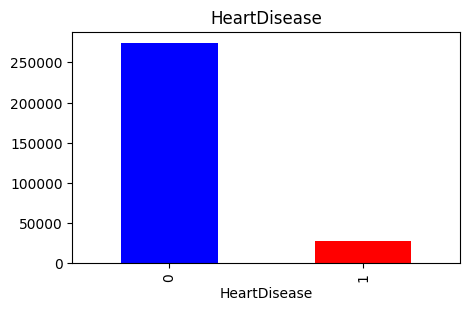

In [116]:
# plot the no of 1's and 0's

(data['HeartDisease'].value_counts().plot(
    kind='bar',
    figsize=(5,3),
    title='HeartDisease',
    color = ['blue','red','green','yellow','orange']
    )
);
plt.show()

In [117]:
# check for null values
data.isnull().sum()

HeartDisease                           0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
DiffWalking                            0
Sex                                    0
PhysicalActivity                       0
GenHealth                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
BMI_category                           0
Nw_Age                                 0
Nw_PhyHealth                           0
Nw_MntHealth                           0
Nw_SleepTime                           0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Other                             0
Race_White                             0
Diabetic_No, borderline diabetes       0
Diabetic_Yes                           0
Diabetic_Yes (during pregnancy)        0
dtype: int64

### 10.1 Respose and Target variable <a class="anchor" id="10_1ResposeandTargetvariable"></a>

In [118]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

# check length of 1's and 0's

one = np.where(y==1)
zero = np.where(y==0)

len(one[0]), len(zero[0])

(27261, 274456)

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 11. Train test split <a class="anchor" id="11_Traintestsplit"></a></div>

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 11.1 Fit the model uing Logitic Regression <a class="anchor" id="11_1 FitthemodeluingLogiticRegression"></a>

In [20]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
accuracy_score(y_predict, y)

0.9108104614589168

In [22]:
np.unique(y_predict)

array([0, 1], dtype=int64)

### 11.2 The matrix trap <a class="anchor" id="11_2Thematrixtrap"></a>

One of the major issues that new developer users fall into when dealing with unbalanced datasets relates to the evaluation metrics used to evaluate their machine learning model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features, and it will have a high accuracy rate, obviously not the correct one.

Let’s do this experiment using the simple XGBClassifier and no feature engineering:

In [23]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 0.9120045074903884
Roc auc scote: 0.7279415429167929
F1 core: 0.16140240050536955


In [24]:
print(classification_report(y_test, xgb_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54962
           1       0.54      0.09      0.16      5382

    accuracy                           0.91     60344
   macro avg       0.73      0.54      0.56     60344
weighted avg       0.88      0.91      0.88     60344



In [25]:
confusion_matrix(xgb_y_predict, y_test)

array([[54523,  4871],
       [  439,   511]], dtype=int64)

### Note:
From confusion matrix, the model suffer from high vaiance and bias. Therefore, I'll apply resampling Technique.

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 12. Resampling Technique <a class="anchor" id="12_ResamplingTechnique"></a></div>

One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch).

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

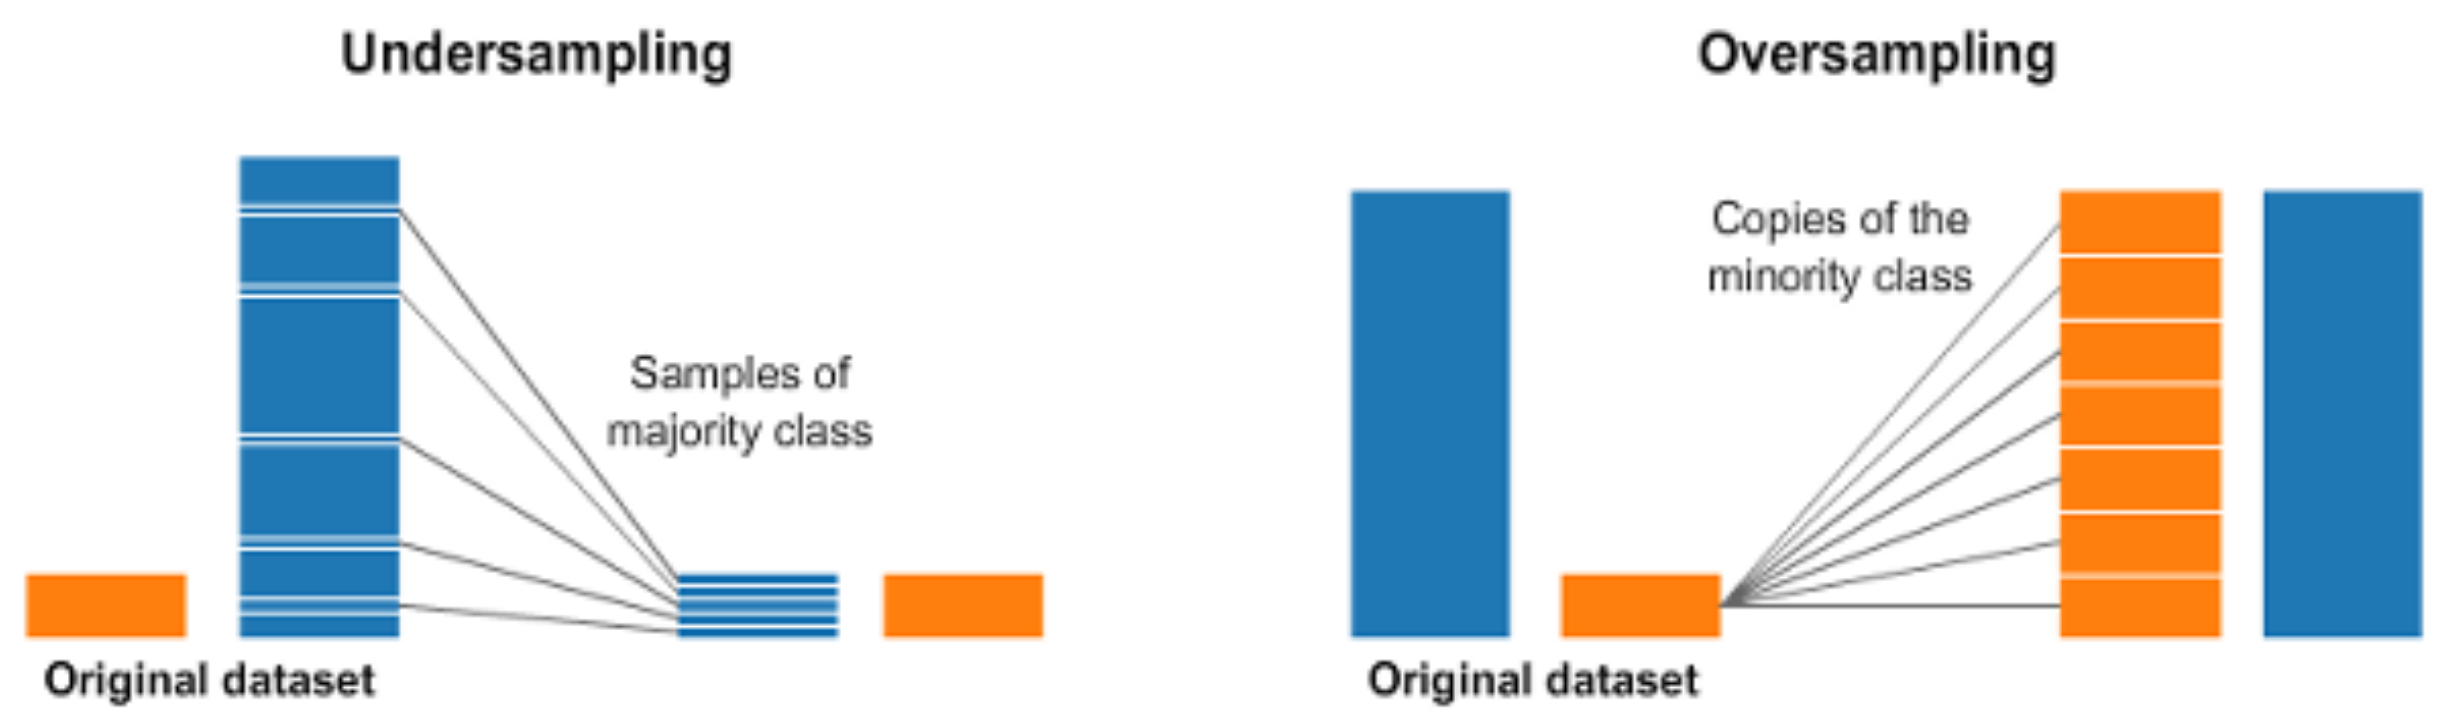

In [26]:
# HeartDisease count
class_count_0, class_count_1 = data['HeartDisease'].value_counts()

# divie HeartDisease
class_0 = data[data['HeartDisease'] == 0]
class_1 = data[data['HeartDisease'] == 1]

In [27]:
# print the shape of the HeartDisease

print('HeartDisease 0:', class_0.shape)
print('\nHeartDisease 1:', class_1.shape)

HeartDisease 0: (274456, 23)

HeartDisease 1: (27261, 23)


### 12.1 Random under sampling <a class="anchor" id="12_1Randomundersampling"></a>

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

total HeartDisease of 1 and 0:
 HeartDisease
0    27261
1    27261
Name: count, dtype: int64


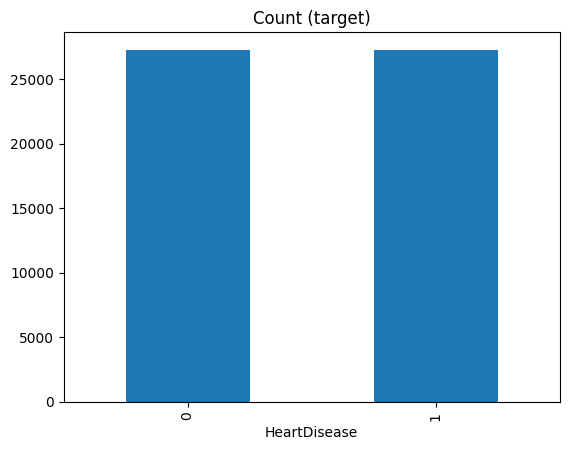

In [28]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total HeartDisease of 1 and 0:\n",test_under['HeartDisease'].value_counts())

test_under['HeartDisease'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

### 12.2 Random over sampling <a class="anchor" id="12_2Randomoversampling"></a>

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

HeartDisease count of 1 and 0:
 HeartDisease
1    274456
0    274456
Name: count, dtype: int64


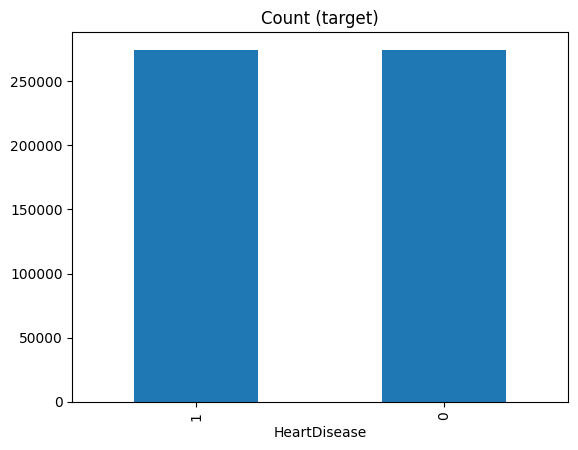

In [29]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of HeartDisease count
print('HeartDisease count of 1 and 0:\n', test_under['HeartDisease'].value_counts())

# plot the HeartDisease
test_under['HeartDisease'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

### Note:
Because of many disadvantage of these techniques, the scientific literature has proposed numbers of more sophisticated resampling techniques. Like;Balance data with imbalance learn module.

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 13. Balance data with imbalance learn module <a class="anchor" id="13_Balancedatawithimbalancelearnmodule"></a></div>

In [30]:
# import library
import imblearn

### 13.1 Random under-sampling with imblearn <a class="anchor" id="13_1Randomunder-samplingwithimblearn"></a>

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [31]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 274456, 1: 27261})
Resample dataset shape Counter({0: 27261, 1: 27261})


### 13.2 Random over-sampling with imblearn <a class="anchor" id="13_2Randomover-samplingwithimblearn"></a>

One way to fight imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with the replacement of the currently available samples.

In [32]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 274456, 1: 27261})
Resample dataset shape Counter({0: 274456, 1: 274456})


### 13.3 under-sampling Tomek links <a class="anchor" id="13_3undersamplingTomeklinks"></a>

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other.
In the code below, we’ll use ratio='majority' to resample the majority class.

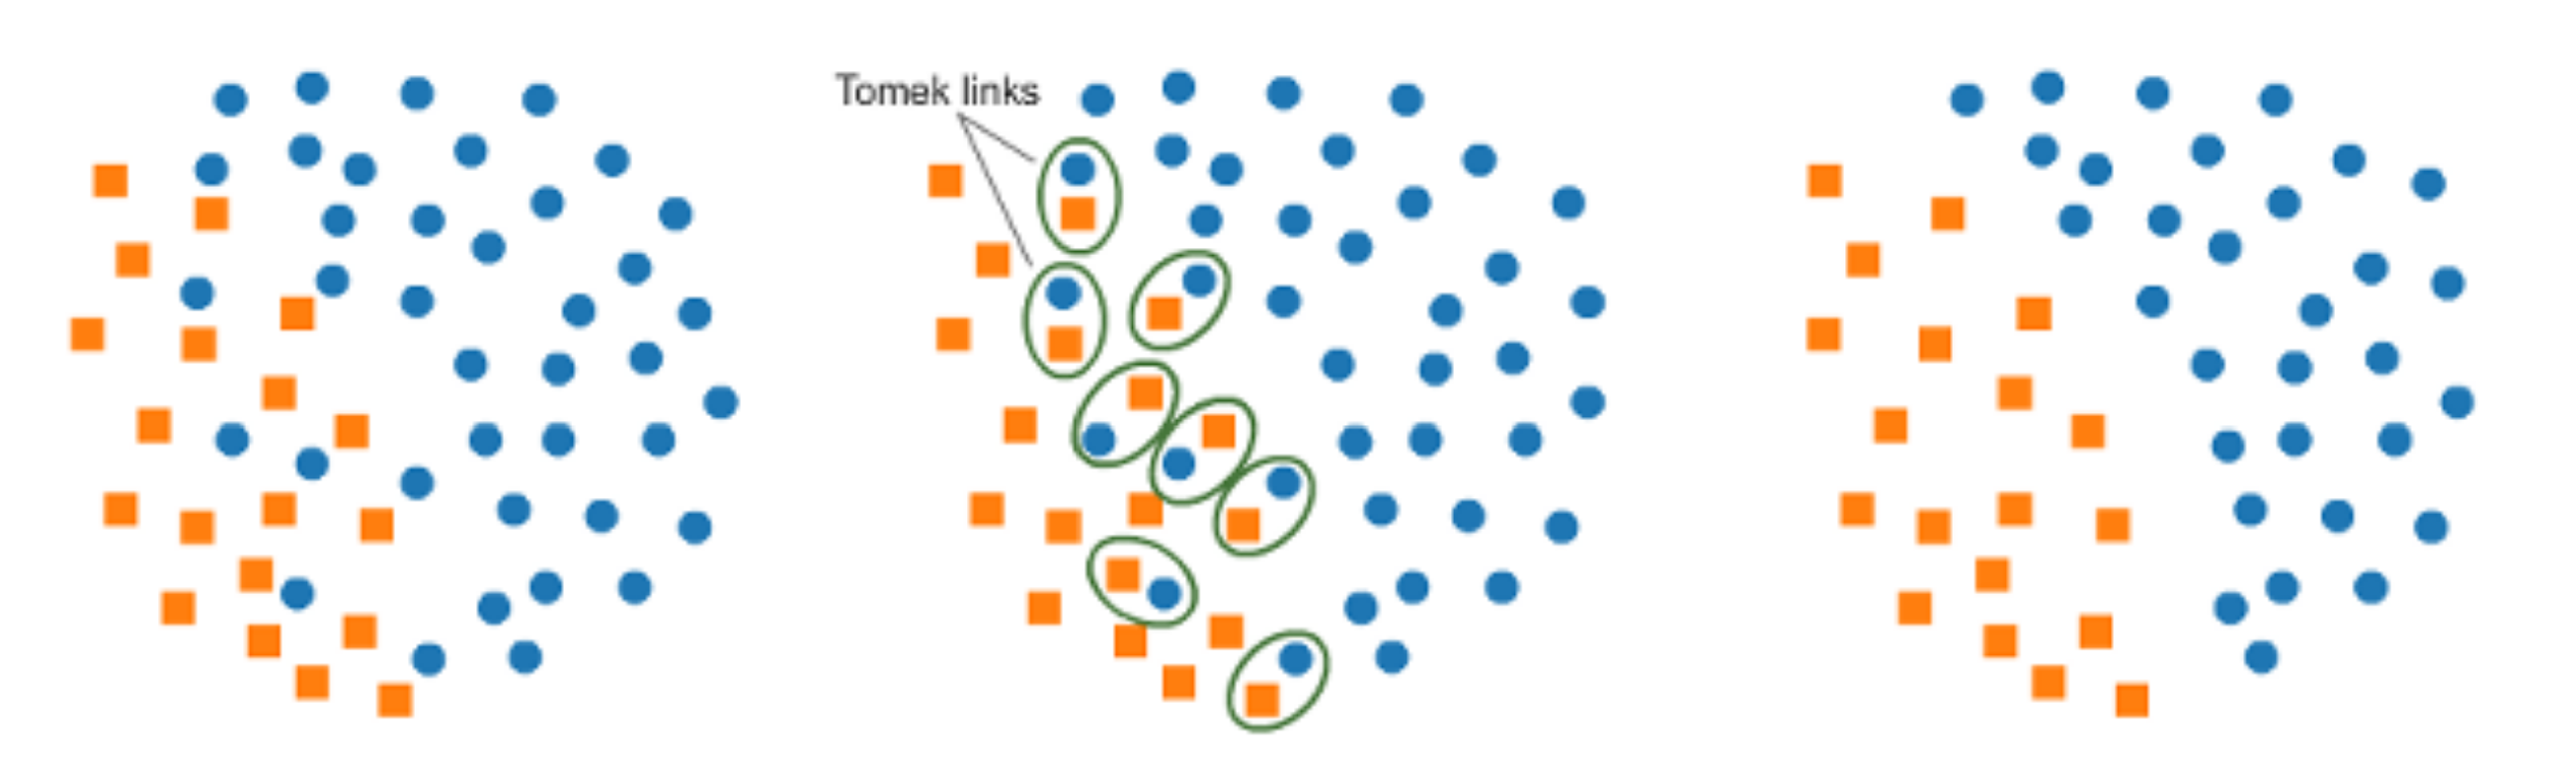

In [33]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 274456, 1: 27261})
Resample dataset shape: Counter({0: 268713, 1: 27261})


### 13.4 Synthetic minority over-sampleing technique <a class="anchor" id="13_4Syntheticminorityover-sampleingtechnique"></a>

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
SMOTE algorithm works in 4 simple steps:
 1. Choose a minority class as the input vector.
 2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
 3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
 4. Repeat the steps until the data is balanced.

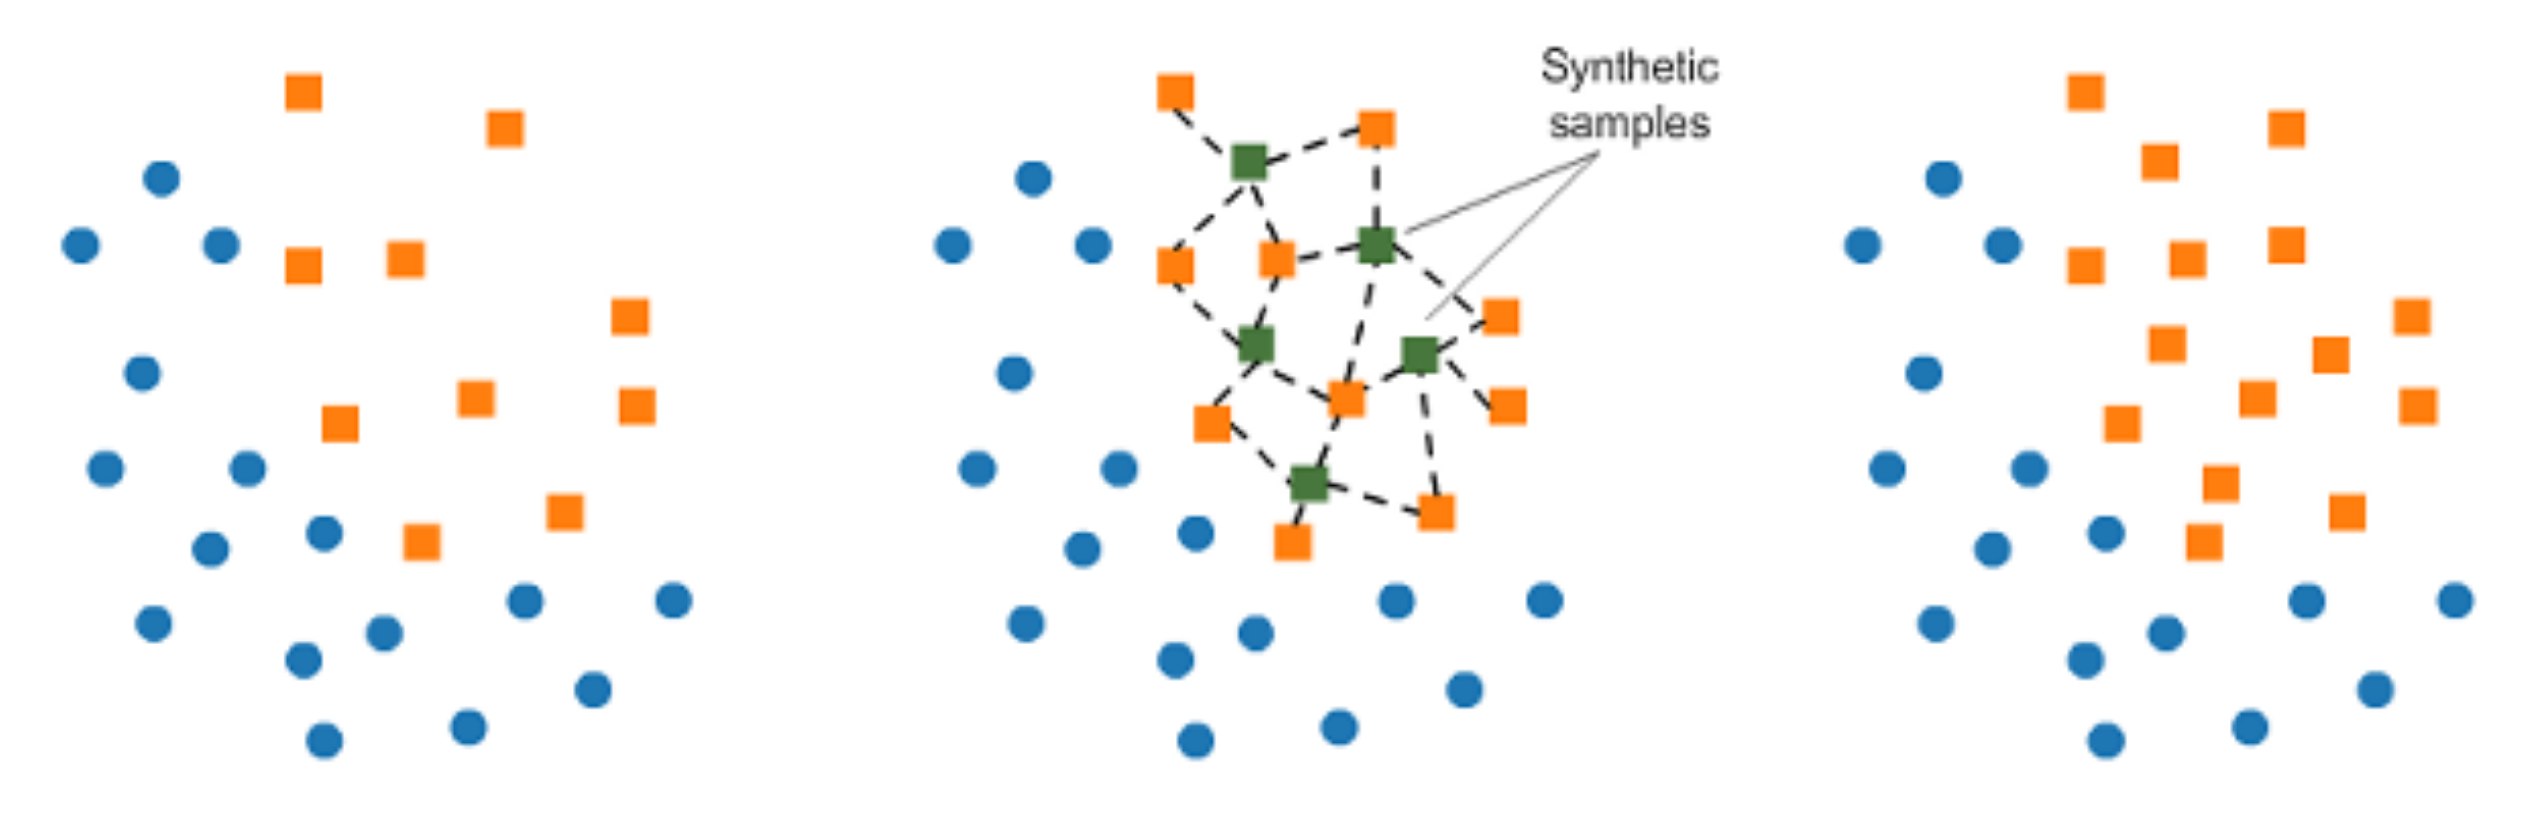

In [120]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 274456, 1: 27261})
Resampple dataset shape: Counter({0: 274456, 1: 274456})


### 13.5 NearMiss <a class="anchor" id="13_5NearMiss"></a>

NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance will make the majority class equal to the minority class.

In [35]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 274456, 1: 27261})
Resample dataset shape: Counter({0: 27261, 1: 27261})


## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14. ApplyAlgorithms<a class="anchor" id="14_ApplyAlgorithms"></a></div>

### <div style="font-family: Trebuchet MS; background-color: #74992e ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.1 XGBClassifier <a class="anchor" id="14_1XGBClassifier"></a></div>
- Case 1: Random under-sampling with imblearn

In [36]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.760829529653766
Accuracy score: 0.7609353507565337
F1 score: 0.7705307631370479


In [37]:
print(classification_report(y_test1, predict_y))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5438
           1       0.74      0.80      0.77      5467

    accuracy                           0.76     10905
   macro avg       0.76      0.76      0.76     10905
weighted avg       0.76      0.76      0.76     10905



### <div style="font-family: Trebuchet MS; background-color: #74992e ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.1 XGBClassifier <a class="anchor" id="14_1XGBClassifier"></a></div>

- Case 2: Random over-sampling with imblearn

In [38]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.7763980614045858
Accuracy score: 0.7763588169388703
F1 score: 0.7863371334087547


In [39]:
print(classification_report(y_test1, predict_y))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     54937
           1       0.75      0.82      0.79     54846

    accuracy                           0.78    109783
   macro avg       0.78      0.78      0.78    109783
weighted avg       0.78      0.78      0.78    109783



### <div style="font-family: Trebuchet MS; background-color: #74992e ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.1 XGBClassifier <a class="anchor" id="14_1XGBClassifier"></a></div>

- Case 3: Under-sampling Tomek links

In [40]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tl, y_tl, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.5619989112358645
Accuracy score: 0.9102626911056677
F1 score: 0.21790341578327443


In [41]:
print(classification_report(y_test1, predict_y))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53649
           1       0.59      0.13      0.22      5546

    accuracy                           0.91     59195
   macro avg       0.76      0.56      0.59     59195
weighted avg       0.89      0.91      0.88     59195



### <div style="font-family: Trebuchet MS; background-color: #74992e ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.1 XGBClassifier <a class="anchor" id="14_1XGBClassifier"></a></div>

- Case 4: Synthetic minority over-sampleing technique

In [42]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.9045031190866241
Accuracy score: 0.9045298452401556
F1 score: 0.9012725953975566


In [43]:
print(classification_report(y_test1, predict_y))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     54937
           1       0.93      0.87      0.90     54846

    accuracy                           0.90    109783
   macro avg       0.91      0.90      0.90    109783
weighted avg       0.91      0.90      0.90    109783



### <div style="font-family: Trebuchet MS; background-color: #74992e ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.1 XGBClassifier <a class="anchor" id="14_1XGBClassifier"></a></div>

- Case 5: NearMiss

In [44]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.897092626305158
Accuracy score: 0.8969280146721688
F1 score: 0.890405616224649


In [45]:
print(classification_report(y_test1, predict_y))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5438
           1       0.95      0.84      0.89      5467

    accuracy                           0.90     10905
   macro avg       0.90      0.90      0.90     10905
weighted avg       0.90      0.90      0.90     10905



### <div style="font-family: Trebuchet MS; background-color: #ef4a53 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.2 Tree based algorithm (RandomForestClassifier)<a class="anchor" id="14_2Treebasedalgorithm(RandomForestClassifier)"></a></div>

- Case 1: Random under-sampling with imblearn


In [46]:
# load library
from sklearn.ensemble import RandomForestClassifier

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size =0.20, random_state=42)

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))

ROCAUC score: 0.741232190360391
Accuracy score: 0.7413113250802384
F1 score: 0.7492667318460581


In [47]:
print(classification_report(y_test1, rfc_predict))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      5438
           1       0.73      0.77      0.75      5467

    accuracy                           0.74     10905
   macro avg       0.74      0.74      0.74     10905
weighted avg       0.74      0.74      0.74     10905



### <div style="font-family: Trebuchet MS; background-color: #ef4a53 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.2 Tree based algorithm (RandomForestClassifier)<a class="anchor" id="14_2Treebasedalgorithm(RandomForestClassifier)"></a></div>

- Case 2: Random over-sampling with imblearn

In [48]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))

ROCAUC score: 0.9062312260919178
Accuracy score: 0.906196769991711
F1 score: 0.9098753763215012


In [49]:
print(classification_report(y_test1, rfc_predict))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     54937
           1       0.87      0.95      0.91     54846

    accuracy                           0.91    109783
   macro avg       0.91      0.91      0.91    109783
weighted avg       0.91      0.91      0.91    109783



### <div style="font-family: Trebuchet MS; background-color: #ef4a53 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.2 Tree based algorithm (RandomForestClassifier)<a class="anchor" id="14_2Treebasedalgorithm(RandomForestClassifier)"></a></div>

- Case 3: Under-sampling Tomek links

In [50]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tl, y_tl, test_size =0.20, random_state=42)

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))

ROCAUC score: 0.573925240660707
Accuracy score: 0.9030154573866036
F1 score: 0.24609323703217334


In [51]:
print(classification_report(y_test1, rfc_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53649
           1       0.45      0.17      0.25      5546

    accuracy                           0.90     59195
   macro avg       0.69      0.57      0.60     59195
weighted avg       0.88      0.90      0.88     59195



### <div style="font-family: Trebuchet MS; background-color: #ef4a53 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.2 Tree based algorithm (RandomForestClassifier)<a class="anchor" id="14_2Treebasedalgorithm(RandomForestClassifier)"></a></div>

- Case 4: Synthetic minority over-sampleing technique

In [52]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))

ROCAUC score: 0.9157777119393836
Accuracy score: 0.9157793100935482
F1 score: 0.9155523893029374


In [53]:
print(classification_report(y_test1, rfc_predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     54937
           1       0.92      0.91      0.92     54846

    accuracy                           0.92    109783
   macro avg       0.92      0.92      0.92    109783
weighted avg       0.92      0.92      0.92    109783



### <div style="font-family: Trebuchet MS; background-color: #ef4a53 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.2 Tree based algorithm (RandomForestClassifier)<a class="anchor" id="14_2Treebasedalgorithm(RandomForestClassifier)"></a></div>

- Case 5: **NearMiss**

In [56]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))

ROCAUC score: 0.9070183581007258
Accuracy score: 0.9068317285648785
F1 score: 0.9000590202636238


In [57]:
print(classification_report(y_test1, rfc_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      5438
           1       0.97      0.84      0.90      5467

    accuracy                           0.91     10905
   macro avg       0.91      0.91      0.91     10905
weighted avg       0.92      0.91      0.91     10905



### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.3 Logistic Regression<a class="anchor" id="14_3LogisticRegression"></a></div>

- Case 1: Random under-sampling with imblearn


In [58]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size =0.20, random_state=42)

model =  LogisticRegression()

# fit the predictor and target
model.fit(x_train1, y_train1)

# predict
lg_predict = model.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, lg_predict))
print('Accuracy score:',accuracy_score(y_test1, lg_predict))
print('F1 score:',f1_score(y_test1, lg_predict))

ROCAUC score: 0.7606370948281552
Accuracy score: 0.7606602475928473
F1 score: 0.7632008709853021


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print(classification_report(y_test1, lg_predict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      5438
           1       0.76      0.77      0.76      5467

    accuracy                           0.76     10905
   macro avg       0.76      0.76      0.76     10905
weighted avg       0.76      0.76      0.76     10905



### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.3 Logistic Regression<a class="anchor" id="14_3LogisticRegression"></a></div>

- Case 2: Random over-sampling with imblearn

In [60]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)

model =  LogisticRegression()

# fit the predictor and target
model.fit(x_train1, y_train1)

# predict
lg_predict = model.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, lg_predict))
print('Accuracy score:',accuracy_score(y_test1, lg_predict))
print('F1 score:',f1_score(y_test1, lg_predict))

ROCAUC score: 0.7571968618918099
Accuracy score: 0.7571937367351957
F1 score: 0.7579543803574023


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print(classification_report(y_test1, lg_predict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     54937
           1       0.75      0.76      0.76     54846

    accuracy                           0.76    109783
   macro avg       0.76      0.76      0.76    109783
weighted avg       0.76      0.76      0.76    109783



### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.3 Logistic Regression<a class="anchor" id="14_3LogisticRegression"></a></div>

- Case 3: Under-sampling Tomek links

In [62]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tl, y_tl, test_size =0.20, random_state=42)

model =  LogisticRegression()

# fit the predictor and target
model.fit(x_train1, y_train1)

# predict
lg_predict = model.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, lg_predict))
print('Accuracy score:',accuracy_score(y_test1, lg_predict))
print('F1 score:',f1_score(y_test1, lg_predict))

ROCAUC score: 0.5689195481653708
Accuracy score: 0.9104991975673621
F1 score: 0.23725885401670027


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print(classification_report(y_test1, lg_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53649
           1       0.59      0.15      0.24      5546

    accuracy                           0.91     59195
   macro avg       0.75      0.57      0.59     59195
weighted avg       0.89      0.91      0.89     59195



### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.3 Logistic Regression<a class="anchor" id="14_3LogisticRegression"></a></div>

- Case 4: Synthetic minority over-sampleing technique

In [64]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

model =  LogisticRegression()

# fit the predictor and target
model.fit(x_train1, y_train1)

# predict
lg_predict = model.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, lg_predict))
print('Accuracy score:',accuracy_score(y_test1, lg_predict))
print('F1 score:',f1_score(y_test1, lg_predict))

ROCAUC score: 0.7560196532757588
Accuracy score: 0.7560095825401019
F1 score: 0.7587889921475398


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(classification_report(y_test1, lg_predict))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     54937
           1       0.75      0.77      0.76     54846

    accuracy                           0.76    109783
   macro avg       0.76      0.76      0.76    109783
weighted avg       0.76      0.76      0.76    109783



### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 14.3 Logistic Regression<a class="anchor" id="14_3LogisticRegression"></a></div>

- Case 5: NearMiss

In [66]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

model =  LogisticRegression()

# fit the predictor and target
model.fit(x_train1, y_train1)

# predict
lg_predict = model.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, lg_predict))
print('Accuracy score:',accuracy_score(y_test1, lg_predict))
print('F1 score:',f1_score(y_test1, lg_predict))

ROCAUC score: 0.8581396433029955
Accuracy score: 0.8579550664832646
F1 score: 0.8477341983682296


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print(classification_report(y_test1, lg_predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      5438
           1       0.92      0.79      0.85      5467

    accuracy                           0.86     10905
   macro avg       0.86      0.86      0.86     10905
weighted avg       0.87      0.86      0.86     10905



### <div style="font-family: Trebuchet MS; background-color: #00ae98 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 15. XGBoost API model (without sklearn and fit)<a class="anchor" id="15_XGBoostAPImodel(withoutsklearnandfit)"></a></div>
- Case 1: Random under-sampling with imblearn



In [68]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size =0.20, random_state=42)

data_dmatrix = xgb.DMatrix(data=x_train1,label=y_train1)

xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.300000012,
                max_depth = 6, min_child_weight=10)

xg_reg.fit(x_train1,y_train1)

preds2 = xg_reg.predict(x_test1)

dftrain = xgb.DMatrix(x_train1, y_train1)
dftest = xgb.DMatrix(x_test1, y_test1)

params = {"objective":"reg:squarederror","base_score":0.5, "booster":"gbtree", "colsample_bylevel":1,
             "colsample_bynode":1, "colsample_bytree":1, "gamma":0, "gpu_id":-1,
              "interaction_constraints":'', "learning_rate":0.300000012,
              "max_delta_step":0, "max_depth":6, "min_child_weight":1,
              "monotone_constraints":'()', "missing":None, "n_jobs":8,
              "num_parallel_tree":1, "random_state":0, "reg_alpha":0,
              "reg_lambda":1, "scale_pos_weight":1, "subsample":1, "seed":0,
            "tree_method":"exact", "validate_parameters":1,
             "verbosity":None, "objective":"binary:logistic", "nthread":-1}

bst = xgb.train(params, dftrain)

preds = bst.predict(dftest)



In [69]:
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test1,predictions))

Accuracy: 76.73%
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      5438
           1       0.74      0.82      0.78      5467

    accuracy                           0.77     10905
   macro avg       0.77      0.77      0.77     10905
weighted avg       0.77      0.77      0.77     10905



### <div style="font-family: Trebuchet MS; background-color: #00ae98 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 15. XGBoost API model (without sklearn and fit)<a class="anchor" id="15_XGBoostAPImodel(withoutsklearnandfit)"></a></div>
- Case 2: Random over-sampling with imblearn

In [72]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)

data_dmatrix = xgb.DMatrix(data=x_train1,label=y_train1)

xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.300000012,
                max_depth = 6, min_child_weight=10)

xg_reg.fit(x_train1,y_train1)

preds2 = xg_reg.predict(x_test1)

dftrain = xgb.DMatrix(x_train1, y_train1)
dftest = xgb.DMatrix(x_test1, y_test1)

params = {"objective":"reg:squarederror","base_score":0.5, "booster":"gbtree", "colsample_bylevel":1,
             "colsample_bynode":1, "colsample_bytree":1, "gamma":0, "gpu_id":-1,
              "interaction_constraints":'', "learning_rate":0.300000012,
              "max_delta_step":0, "max_depth":6, "min_child_weight":1,
              "monotone_constraints":'()', "missing":None, "n_jobs":8,
              "num_parallel_tree":1, "random_state":0, "reg_alpha":0,
              "reg_lambda":1, "scale_pos_weight":1, "subsample":1, "seed":0,
            "tree_method":"exact", "validate_parameters":1,
             "verbosity":None, "objective":"binary:logistic", "nthread":-1}

bst = xgb.train(params, dftrain)

preds = bst.predict(dftest)


In [73]:
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test1,predictions))

Accuracy: 76.27%
              precision    recall  f1-score   support

           0       0.79      0.71      0.75     54937
           1       0.74      0.82      0.77     54846

    accuracy                           0.76    109783
   macro avg       0.77      0.76      0.76    109783
weighted avg       0.77      0.76      0.76    109783



### <div style="font-family: Trebuchet MS; background-color: #00ae98 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 15. XGBoost API model (without sklearn and fit)<a class="anchor" id="15_XGBoostAPImodel(withoutsklearnandfit)"></a></div>
- Case 3: Under-sampling Tomek links

In [74]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tl, y_tl, test_size =0.20, random_state=42)

data_dmatrix = xgb.DMatrix(data=x_train1,label=y_train1)

xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.300000012,
                max_depth = 6, min_child_weight=10)

xg_reg.fit(x_train1,y_train1)

preds2 = xg_reg.predict(x_test1)

dftrain = xgb.DMatrix(x_train1, y_train1)
dftest = xgb.DMatrix(x_test1, y_test1)

params = {"objective":"reg:squarederror","base_score":0.5, "booster":"gbtree", "colsample_bylevel":1,
             "colsample_bynode":1, "colsample_bytree":1, "gamma":0, "gpu_id":-1,
              "interaction_constraints":'', "learning_rate":0.300000012,
              "max_delta_step":0, "max_depth":6, "min_child_weight":1,
              "monotone_constraints":'()', "missing":None, "n_jobs":8,
              "num_parallel_tree":1, "random_state":0, "reg_alpha":0,
              "reg_lambda":1, "scale_pos_weight":1, "subsample":1, "seed":0,
            "tree_method":"exact", "validate_parameters":1,
             "verbosity":None, "objective":"binary:logistic", "nthread":-1}

bst = xgb.train(params, dftrain)

preds = bst.predict(dftest)

In [75]:
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test1,predictions))

Accuracy: 91.01%
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     53649
           1       0.63      0.10      0.17      5546

    accuracy                           0.91     59195
   macro avg       0.77      0.55      0.56     59195
weighted avg       0.89      0.91      0.88     59195



### <div style="font-family: Trebuchet MS; background-color: #00ae98 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 15. XGBoost API model (without sklearn and fit)<a class="anchor" id="15_XGBoostAPImodel(withoutsklearnandfit)"></a></div>
- Case 4: Synthetic minority over-sampleing technique

In [76]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

data_dmatrix = xgb.DMatrix(data=x_train1,label=y_train1)

xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.300000012,
                max_depth = 6, min_child_weight=10)

xg_reg.fit(x_train1,y_train1)

preds2 = xg_reg.predict(x_test1)

dftrain = xgb.DMatrix(x_train1, y_train1)
dftest = xgb.DMatrix(x_test1, y_test1)

params = {"objective":"reg:squarederror","base_score":0.5, "booster":"gbtree", "colsample_bylevel":1,
             "colsample_bynode":1, "colsample_bytree":1, "gamma":0, "gpu_id":-1,
              "interaction_constraints":'', "learning_rate":0.300000012,
              "max_delta_step":0, "max_depth":6, "min_child_weight":1,
              "monotone_constraints":'()', "missing":None, "n_jobs":8,
              "num_parallel_tree":1, "random_state":0, "reg_alpha":0,
              "reg_lambda":1, "scale_pos_weight":1, "subsample":1, "seed":0,
            "tree_method":"exact", "validate_parameters":1,
             "verbosity":None, "objective":"binary:logistic", "nthread":-1}

bst = xgb.train(params, dftrain)

preds = bst.predict(dftest)

In [77]:
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test1,predictions))

Accuracy: 86.84%
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     54937
           1       0.85      0.90      0.87     54846

    accuracy                           0.87    109783
   macro avg       0.87      0.87      0.87    109783
weighted avg       0.87      0.87      0.87    109783



### <div style="font-family: Trebuchet MS; background-color: #00ae98 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 15. XGBoost API model (without sklearn and fit)<a class="anchor" id="15_XGBoostAPImodel(withoutsklearnandfit)"></a></div>
- Case 5: NearMiss

In [78]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

data_dmatrix = xgb.DMatrix(data=x_train1,label=y_train1)

xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.300000012,
                max_depth = 6, min_child_weight=10)

xg_reg.fit(x_train1,y_train1)

preds2 = xg_reg.predict(x_test1)

dftrain = xgb.DMatrix(x_train1, y_train1)
dftest = xgb.DMatrix(x_test1, y_test1)

params = {"objective":"reg:squarederror","base_score":0.5, "booster":"gbtree", "colsample_bylevel":1,
             "colsample_bynode":1, "colsample_bytree":1, "gamma":0, "gpu_id":-1,
              "interaction_constraints":'', "learning_rate":0.300000012,
              "max_delta_step":0, "max_depth":6, "min_child_weight":1,
              "monotone_constraints":'()', "missing":None, "n_jobs":8,
              "num_parallel_tree":1, "random_state":0, "reg_alpha":0,
              "reg_lambda":1, "scale_pos_weight":1, "subsample":1, "seed":0,
            "tree_method":"exact", "validate_parameters":1,
             "verbosity":None, "objective":"binary:logistic", "nthread":-1}

bst = xgb.train(params, dftrain)

preds = bst.predict(dftest)

In [79]:
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test1,predictions))

Accuracy: 88.23%
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5438
           1       0.95      0.81      0.87      5467

    accuracy                           0.88     10905
   macro avg       0.89      0.88      0.88     10905
weighted avg       0.89      0.88      0.88     10905



### 15.1 k-fold Cross Validation using XGBoost <a class="anchor" id="15_1k-foldCrossValidationusingXGBoos"></a>

In [80]:
# Note that here you are using the Dmatrix object you created before.
cv_results_train = xgb.cv(dtrain=dftrain, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results_test = xgb.cv(dtrain=dftest, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

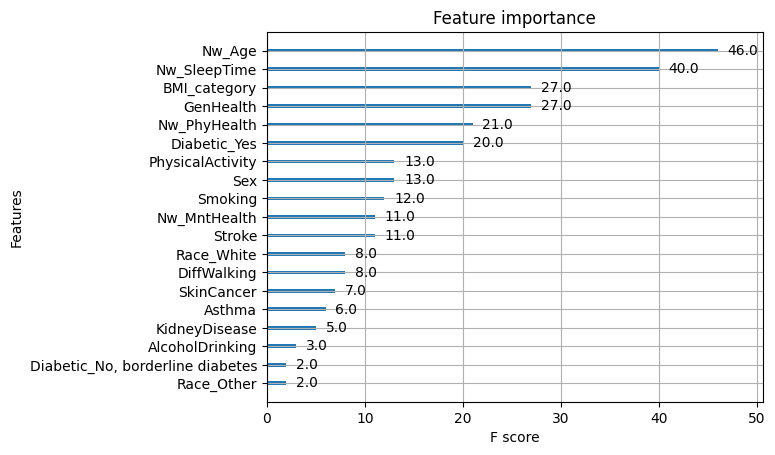

In [81]:
xg_reg = xgb.train(params=params, dtrain=dftrain, num_boost_round=10)

xgb.plot_importance(xg_reg)
fig = matplotlib.pyplot.gcf()

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 16. A Deep Learning Model to Perform Binary Classification<a class="anchor" id="16_ADeepLearningModeltoPerformBinaryClassification"></a></div>

### 16.1 Two Lyers <a class="anchor" id="16_1TwoLyers"></a>

In [130]:
# Two Lyers

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=22))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1000)              23000     
                                                                 
 dense_12 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 24,001
Trainable params: 24,001
Non-trainable params: 0
_________________________________________________________________


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
2414/2414 [==============================] - 12s 5ms/step - loss: 0.2457 - accuracy: 0.9102 - val_loss: 0.2388 - val_accuracy: 0.9119
Epoch 2/20
2414/2414 [==============================] - 11s 4ms/step - loss: 0.2383 - accuracy: 0.9109 - val_loss: 0.2369 - val_accuracy: 0.9120
Epoch 3/20
2414/2414 [==============================] - 11s 4ms/step - loss: 0.2375 - accuracy: 0.9111 - val_loss: 0.2374 - val_accuracy: 0.9114
Epoch 4/20
2414/2414 [==============================] - 10s 4ms/step - loss: 0.2370 - accuracy: 0.9113 - val_loss: 0.2375 - val_accuracy: 0.9118
Epoch 5/20
2414/2414 [==============================] - 10s 4ms/step - loss: 0.2364 - accuracy: 0.9114 - val_loss: 0.2373 - val_accuracy: 0.9120
Epoch 6/20
2414/2414 [==============================] - 11s 5ms/step - loss: 0.2362 - accuracy: 0.9114 - val_loss: 0.2375 - val_accuracy: 0.9118
Epoch 7/20
2414/2414 [==============================] - 10s 4ms/step - loss: 0.2358 - accuracy: 0.9116 - val_loss: 0.2378 - val_ac

In [132]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


1886/1886 [==============================] - 4s 2ms/step - loss: 0.2380 - accuracy: 0.9120
Test accuracy: 0.9120211005210876


[]

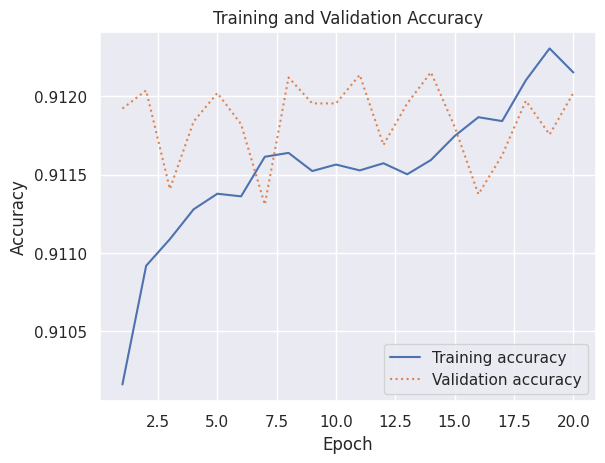

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1886/1886 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     54962
           1       0.56      0.06      0.11      5382

    accuracy                           0.91     60344
   macro avg       0.74      0.53      0.53     60344
weighted avg       0.88      0.91      0.88     60344



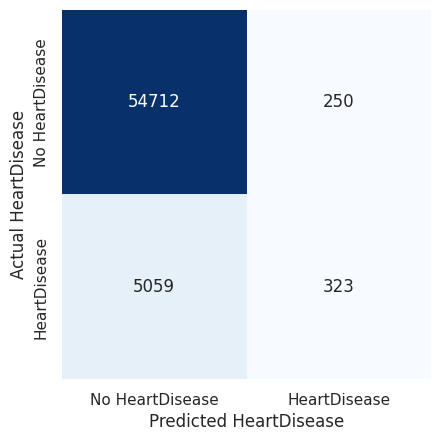

In [134]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

### 16.2 Three Layers <a class="anchor" id="16_2ThreeLayers"></a>

In [121]:
# Three Layers

import keras
import keras.utils
from keras import utils as np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow as tf


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
241373/241373 [==============================] - 446s 2ms/step - loss: 0.2450 - accuracy: 0.9105
Epoch 2/10
241373/241373 [==============================] - 445s 2ms/step - loss: 0.2408 - accuracy: 0.9111
Epoch 3/10
241373/241373 [==============================] - 473s 2ms/step - loss: 0.2404 - accuracy: 0.9108
Epoch 4/10
241373/241373 [==============================] - 468s 2ms/step - loss: 0.2401 - accuracy: 0.9109
Epoch 5/10
241373/241373 [==============================] - 432s 2ms/step - loss: 0.2400 - accuracy: 0.9108
Epoch 6/10
241373/241373 [==============================] - 436s 2ms/step - loss: 0.2402 - accuracy: 0.9110
Epoch 7/10
241373/241373 [==============================] - 428s 2ms/step - loss: 0.2411 - accuracy: 0.9110
Epoch 8/10
241373/241373 [==============================] - 444s 2ms/step - loss: 0.2409 - accuracy: 0.9110
Epoch 9/10
241373/241373 [==============================] - 488s 2ms/step - loss: 0.2412 - accuracy: 0.9112
Epoch 10/10
1886/1886 [=====

In [122]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

1886/1886 [==============================] - 3s 2ms/step - loss: 0.2405 - accuracy: 0.9116
Test accuracy: 0.9115902185440063


[]

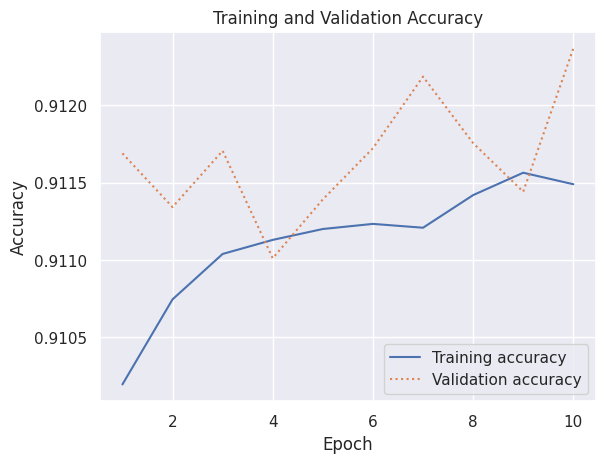

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1886/1886 [==============================] - 6s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54962
           1       0.53      0.09      0.15      5382

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



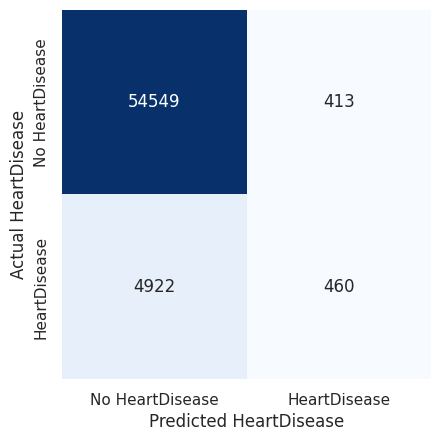

In [124]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

### 16. A Deep Learning Model to Perform Binary Classification
- Case 1: Random under-sampling with imblearn

In [222]:
# Two Lyers

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=22))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
437/437 [==============================] - 2s 4ms/step - loss: 0.5031 - accuracy: 0.7586 - val_loss: 0.4908 - val_accuracy: 0.7666
Epoch 2/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4910 - accuracy: 0.7654 - val_loss: 0.4894 - val_accuracy: 0.7655
Epoch 3/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4896 - accuracy: 0.7665 - val_loss: 0.4898 - val_accuracy: 0.7669
Epoch 4/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4887 - accuracy: 0.7674 - val_loss: 0.4900 - val_accuracy: 0.7687
Epoch 5/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4882 - accuracy: 0.7669 - val_loss: 0.4893 - val_accuracy: 0.7652
Epoch 6/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4878 - accuracy: 0.7670 - val_loss: 0.4894 - val_accuracy: 0.7655
Epoch 7/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4874 - accuracy: 0.7680 - val_loss: 0.4892 - val_accuracy: 0.7658
Epoch 

In [230]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


341/341 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7650
Test accuracy: 0.7649701833724976


[]

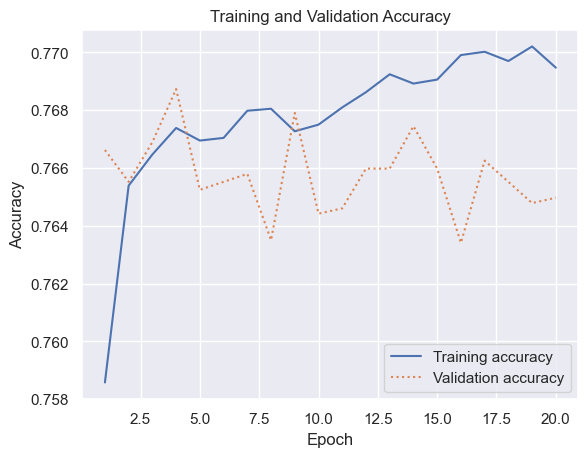

In [231]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

341/341 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      5438
           1       0.74      0.82      0.78      5467

    accuracy                           0.76     10905
   macro avg       0.77      0.76      0.76     10905
weighted avg       0.77      0.76      0.76     10905



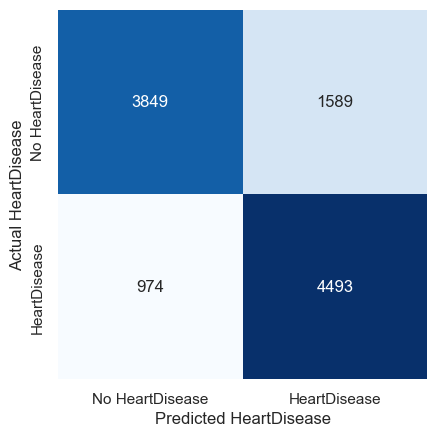

In [232]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

### 16. A Deep Learning Model to Perform Binary Classification
- Case 2: Random over-sampling with imblearn

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
4392/4392 [==============================] - 16s 4ms/step - loss: 0.4895 - accuracy: 0.7656 - val_loss: 0.4905 - val_accuracy: 0.7644
Epoch 2/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4882 - accuracy: 0.7667 - val_loss: 0.4888 - val_accuracy: 0.7666
Epoch 3/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4874 - accuracy: 0.7669 - val_loss: 0.4882 - val_accuracy: 0.7664
Epoch 4/20
4392/4392 [==============================] - 18s 4ms/step - loss: 0.4866 - accuracy: 0.7673 - val_loss: 0.4875 - val_accuracy: 0.7659
Epoch 5/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4860 - accuracy: 0.7681 - val_loss: 0.4889 - val_accuracy: 0.7657
Epoch 6/20
4392/4392 [==============================] - 18s 4ms/step - loss: 0.4854 - accuracy: 0.7683 - val_loss: 0.4868 - val_accuracy: 0.7671
Epoch 7/20
4392/4392 [==============================] - 18s 4ms/step - loss: 0.4849 - accuracy: 0.7685 - val_loss: 0.4871 - val_ac

In [234]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


3431/3431 [==============================] - 9s 3ms/step - loss: 0.4842 - accuracy: 0.7680
Test accuracy: 0.7679513096809387


[]

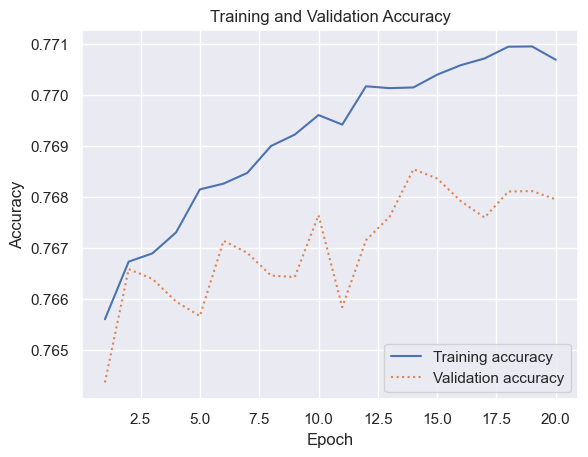

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

3431/3431 [==============================] - 7s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.72      0.76     54937
           1       0.75      0.81      0.78     54846

    accuracy                           0.77    109783
   macro avg       0.77      0.77      0.77    109783
weighted avg       0.77      0.77      0.77    109783



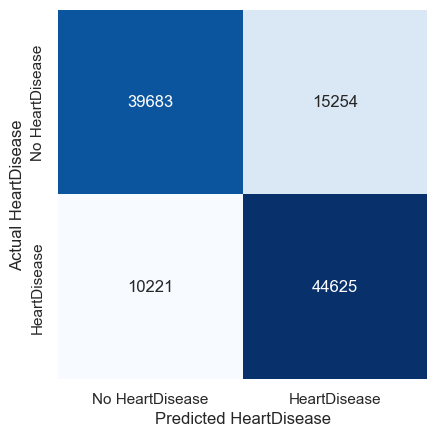

In [236]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

### 16. A Deep Learning Model to Perform Binary Classification
- Case 3: Under-sampling Tomek links

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x_tl, y_tl, test_size=0.2, random_state=42)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
2368/2368 [==============================] - 9s 4ms/step - loss: 0.2320 - accuracy: 0.9114 - val_loss: 0.2319 - val_accuracy: 0.9107
Epoch 2/20
2368/2368 [==============================] - 9s 4ms/step - loss: 0.2302 - accuracy: 0.9124 - val_loss: 0.2329 - val_accuracy: 0.9101
Epoch 3/20
2368/2368 [==============================] - 9s 4ms/step - loss: 0.2300 - accuracy: 0.9127 - val_loss: 0.2334 - val_accuracy: 0.9103
Epoch 4/20
2368/2368 [==============================] - 10s 4ms/step - loss: 0.2296 - accuracy: 0.9127 - val_loss: 0.2349 - val_accuracy: 0.9101
Epoch 5/20
2368/2368 [==============================] - 9s 4ms/step - loss: 0.2296 - accuracy: 0.9129 - val_loss: 0.2337 - val_accuracy: 0.9104
Epoch 6/20
2368/2368 [==============================] - 8s 4ms/step - loss: 0.2294 - accuracy: 0.9128 - val_loss: 0.2341 - val_accuracy: 0.9102
Epoch 7/20
2368/2368 [==============================] - 9s 4ms/step - loss: 0.2293 - accuracy: 0.9128 - val_loss: 0.2337 - val_accuracy

In [238]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


1850/1850 [==============================] - 5s 3ms/step - loss: 0.2352 - accuracy: 0.9101
Test accuracy: 0.9101444482803345


[]

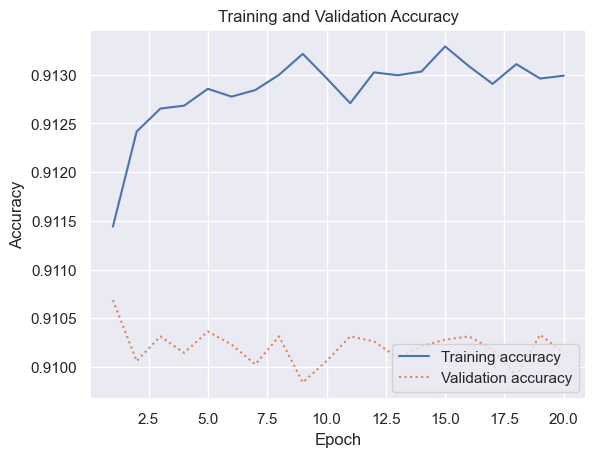

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1850/1850 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53649
           1       0.59      0.14      0.22      5546

    accuracy                           0.91     59195
   macro avg       0.75      0.56      0.59     59195
weighted avg       0.89      0.91      0.88     59195



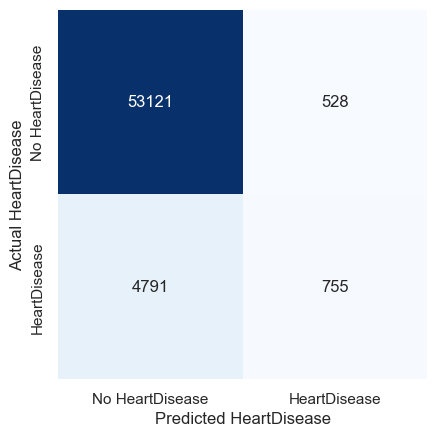

In [240]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

### 16. A Deep Learning Model to Perform Binary Classification
- Case 4: Synthetic minority over-sampleing technique

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4836 - accuracy: 0.7685 - val_loss: 0.4831 - val_accuracy: 0.7691
Epoch 2/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4796 - accuracy: 0.7712 - val_loss: 0.4814 - val_accuracy: 0.7698
Epoch 3/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4784 - accuracy: 0.7718 - val_loss: 0.4810 - val_accuracy: 0.7696
Epoch 4/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4775 - accuracy: 0.7720 - val_loss: 0.4798 - val_accuracy: 0.7700
Epoch 5/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4770 - accuracy: 0.7726 - val_loss: 0.4798 - val_accuracy: 0.7701
Epoch 6/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4765 - accuracy: 0.7726 - val_loss: 0.4797 - val_accuracy: 0.7708
Epoch 7/20
4392/4392 [==============================] - 17s 4ms/step - loss: 0.4761 - accuracy: 0.7729 - val_loss: 0.4788 - val_ac

In [242]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

3431/3431 [==============================] - 8s 2ms/step - loss: 0.4772 - accuracy: 0.7711
Test accuracy: 0.7711303234100342


[]

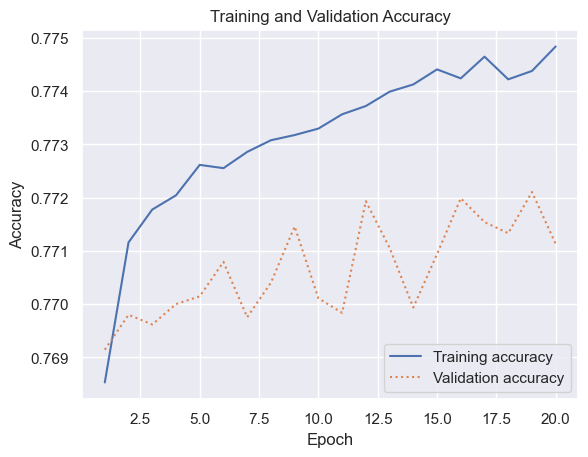

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

3431/3431 [==============================] - 7s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     54937
           1       0.75      0.81      0.78     54846

    accuracy                           0.77    109783
   macro avg       0.77      0.77      0.77    109783
weighted avg       0.77      0.77      0.77    109783



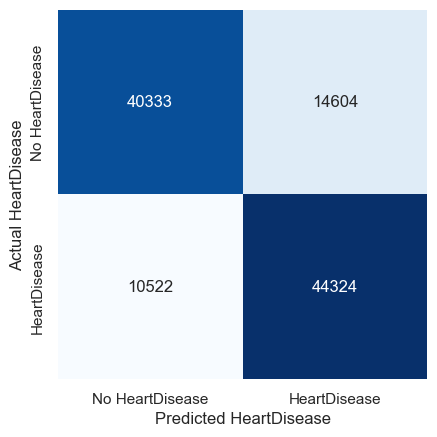

In [244]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

### 16. A Deep Learning Model to Perform Binary Classification
- Case 5: NearMiss

In [245]:
x_train, x_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state=42)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3846 - accuracy: 0.8243 - val_loss: 0.3492 - val_accuracy: 0.8476
Epoch 2/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3405 - accuracy: 0.8517 - val_loss: 0.3331 - val_accuracy: 0.8554
Epoch 3/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3285 - accuracy: 0.8592 - val_loss: 0.3270 - val_accuracy: 0.8569
Epoch 4/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3216 - accuracy: 0.8630 - val_loss: 0.3215 - val_accuracy: 0.8579
Epoch 5/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3161 - accuracy: 0.8654 - val_loss: 0.3176 - val_accuracy: 0.8608
Epoch 6/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3117 - accuracy: 0.8674 - val_loss: 0.3139 - val_accuracy: 0.8620
Epoch 7/20
437/437 [==============================] - 2s 4ms/step - loss: 0.3085 - accuracy: 0.8698 - val_loss: 0.3121 - val_accuracy: 0.8635
Epoch 

In [246]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

341/341 [==============================] - 1s 3ms/step - loss: 0.2912 - accuracy: 0.8778
Test accuracy: 0.877762496471405


[]

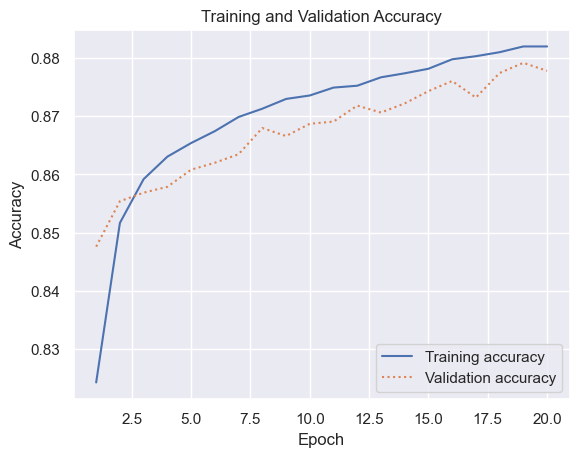

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

341/341 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5438
           1       0.95      0.80      0.87      5467

    accuracy                           0.88     10905
   macro avg       0.89      0.88      0.88     10905
weighted avg       0.89      0.88      0.88     10905



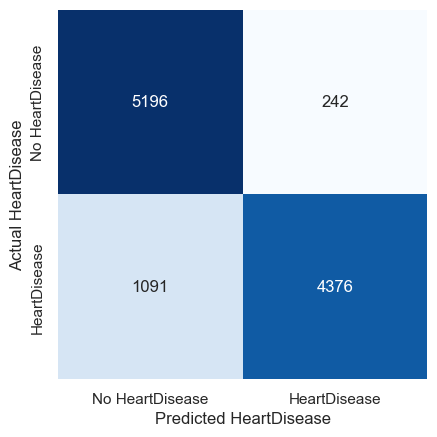

In [248]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No HeartDisease', 'HeartDisease']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted HeartDisease')
plt.ylabel('Actual HeartDisease')

print(classification_report(y_test ,y_predicted))

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 17. Results of Modeling<a class="anchor" id="17_ResultsofModeling"></a></div>

- As you notice from all these calculations in the files (part 2 and part 3). The base line model shows high accuracy for Logistic Regression 0.9117177378046943. But that is not enough to measure the quality of the right model that able to detect all data. Therefore, I applied the resample techniques and confusion matrices.
- I eximined five kinds from the resample techniques:
  - Random under-sampling with imblearn
  - Random over-sampling with imblearn
  - Under-sampling Tomek links
  - Synthetic minority over-sampleing technique
  - NearMiss
- I chose three algprithms from skit-learn that have the highest accuracy from five algrothims have been practiced. I found:
  - XGBClassifier (case: Synthetic minority over-sampleing technique (SMOTE)) is the highest confusion matrix values.
  - Tree based algorithm (RandomForestClassifier) (case: Synthetic minority over-sampleing technique (SMOTE)) is the highest confusion matrix values.
  - Logistic Regression (case: NearMiss) is the highest confusion matrix values.
- After that I eximined XGBoost API model (without sklearn and fit) with using the five resample techniques. I found the highest confusion matrix values at (case: NearMiss).
- Next, I applied Deep Learning Techniques
  - Two Layers
  - Three Layers.
  The results for both cases are not good enough comparing to XGBClassifier and Tree based algorithm (RandomForestClassifier).
- Then I applied resampling Technique and the best result for deep learning with NearMiss.

    - From all those twenty two algorithms, the best and highest confusion matrix values is the Tree based algorithm (RandomForestClassifier) with case SMOTE.
Therefore, I'll choose this algorithm and continue doing the next steps.


### 17.1 Tree based algorithm (RandomForestClassifier) (case: Synthetic minority over-sampleing technique (SMOTE)) <a class="anchor" id="17_1Treebasedalgorithm(RandomForestClassifier(case:Syntheticminorityover-sampleingtechnique(SMOTE))"></a>

In [82]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)


print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))

ROCAUC score: 0.9162325219376523
Accuracy score: 0.9162347540147382
F1 score: 0.9159445724105152


In [83]:
print(classification_report(y_test1, rfc_predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     54937
           1       0.92      0.91      0.92     54846

    accuracy                           0.92    109783
   macro avg       0.92      0.92      0.92    109783
weighted avg       0.92      0.92      0.92    109783



<Axes: >

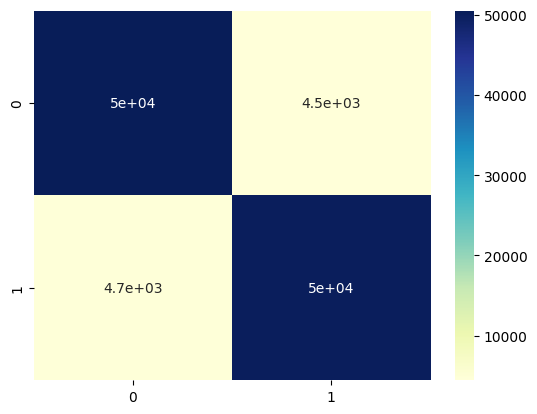

In [84]:
#Lets explore the results
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test1, rfc_predict)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

### 17.2 k-fold Cross Validation <a class="anchor" id="17_2k-foldCrossValidation"></a>

In [85]:
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 999)
kfold = KFold(n_splits=10)
results = cross_val_score(rfc,x_train1,y_train1,cv=kfold)
print("results.mean", np.round(results.mean()*100,2), "%", '  ', "results.std", np.round(results.std()*100))

results.mean 91.58 %    results.std 0.0


### 17.3 Pipeline and GridSearch <a class="anchor" id="17_3PipelineandGridSearch"></a>

In [88]:
rfc = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 123)


# Build a pipeline object
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rlf", RandomForestClassifier())
])

# Declare a hyperparameter grid
param_grid = {
    "rlf__n_estimators": [10, 50, 100],
    "rlf__max_depth": [1, 5, 10, 15],
}


# Perform grid search, fit it, and print score
gs = GridSearchCV(pipe, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1000)


In [90]:
gs.fit(x_train1, y_train1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rlf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rlf__max_depth': [1, 5, 10, 15],
                         'rlf__n_estimators': [10, 50, 100]},
             verbose=1000)

In [91]:
gs.best_params_

{'rlf__max_depth': 15, 'rlf__n_estimators': 100}

In [92]:
best_model = gs.best_estimator_

In [94]:
best_model.predict(x_test1)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [95]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rlf__max_depth,param_rlf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.007162,0.066114,0.107568,0.003619,1,10,"{'rlf__max_depth': 1, 'rlf__n_estimators': 10}",0.684103,0.727780,0.737071,0.678364,0.733572,0.712178,0.025505,12
1,9.193630,1.256693,0.912496,0.310401,1,50,"{'rlf__max_depth': 1, 'rlf__n_estimators': 50}",0.732300,0.736900,0.734657,0.724034,0.728665,0.731311,0.004547,11
2,26.156494,2.411213,2.119382,0.811425,1,100,"{'rlf__max_depth': 1, 'rlf__n_estimators': 100}",0.737117,0.741717,0.740236,0.734942,0.742989,0.739400,0.002968,10
3,4.422909,0.115668,0.162585,0.012565,5,10,"{'rlf__max_depth': 5, 'rlf__n_estimators': 10}",0.785530,0.776786,0.787637,0.781910,0.781486,0.782670,0.003727,9
4,38.612007,3.540851,1.764521,0.577688,5,50,"{'rlf__max_depth': 5, 'rlf__n_estimators': 50}",0.787603,0.789413,0.792112,0.788901,0.787407,0.789087,0.001692,8
5,84.342363,4.329168,3.128359,0.256884,5,100,"{'rlf__max_depth': 5, 'rlf__n_estimators': 100}",0.783026,0.792214,0.793603,0.787227,0.791711,0.789556,0.003903,7
6,15.799321,2.329934,0.593035,0.183140,10,10,"{'rlf__max_depth': 10, 'rlf__n_estimators': 10}",0.836882,0.824642,0.838180,0.824779,0.831870,0.831271,0.005756,6
7,74.515756,3.620996,1.831266,0.653568,10,50,"{'rlf__max_depth': 10, 'rlf__n_estimators': 50}",0.831200,0.833694,0.838157,0.835163,0.831574,0.833958,0.002547,5
8,121.366556,1.550310,2.115306,0.410201,10,100,"{'rlf__max_depth': 10, 'rlf__n_estimators': 100}",0.835379,0.833876,0.836358,0.835834,0.834933,0.835276,0.000845,4
9,19.925242,1.774524,0.743733,0.228047,15,10,"{'rlf__max_depth': 15, 'rlf__n_estimators': 10}",0.864391,0.867545,0.862888,0.866520,0.861896,0.864648,0.002128,3


### 17.4 LOGISTIC REGRESSION ROC <a class="anchor" id="17_4LOGISTICREGRESSIONROC"></a>

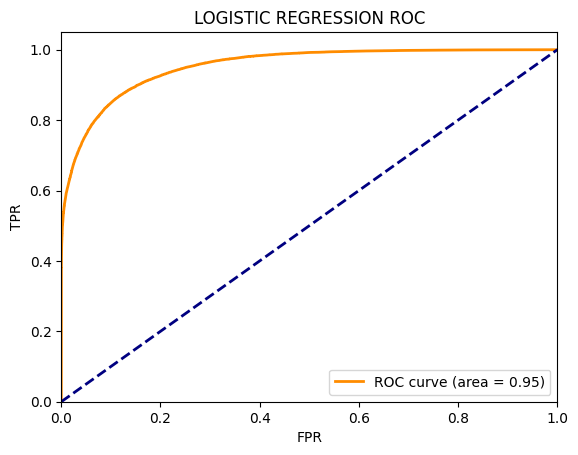

In [96]:
#visualization
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores_rf = gs.predict_proba(x_test1)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test1, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LOGISTIC REGRESSION ROC')
plt.legend(loc="lower right")
plt.show()


## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 18. Lime<a class="anchor" id="18_Lime"></a></div>

### To check the results

In [121]:

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_proba2 = model.predict_proba(X_test)[:, 1]

In [1]:
#!pip install lime

In [125]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns.values,
                                 class_names=['HeartDisease', 'NoHeartDisease'])

In [126]:
X_test

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_PhyHealth,Nw_MntHealth,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
374936,0,0,1,0,1,1,1,0,0,0,...,0.068597,0.096345,0.099108,0,0,0,1,0,0,0
319916,1,0,0,1,0,1,3,0,1,0,...,0.069659,0.096345,0.112187,0,0,0,1,0,0,0
56188,0,0,0,0,0,1,1,0,0,0,...,0.068597,0.065716,0.081181,0,0,0,1,0,0,0
444156,1,0,0,0,1,1,1,0,0,0,...,0.068597,0.096345,0.088889,0,0,0,1,0,0,0
170814,1,0,0,0,1,1,0,0,0,0,...,0.068597,0.111426,0.088889,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440941,1,0,0,0,0,1,1,0,0,0,...,0.068597,0.096345,0.088889,0,0,0,1,0,0,0
313416,0,0,0,0,0,1,0,0,0,0,...,0.068597,0.096345,0.081181,0,0,0,0,0,0,0
393016,1,0,0,0,1,1,1,0,0,0,...,0.068597,0.096345,0.081181,0,0,0,1,0,0,0
463518,0,0,0,0,1,1,1,0,0,1,...,0.068597,0.096345,0.088889,0,0,0,1,0,0,0


In [127]:
result = X_test.copy()

result['predicted_proba'] = y_proba2

result['HeartDisease'] = y_test

result[result['HeartDisease'] == 1].sort_values('predicted_proba', ascending=True).head(50)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),predicted_proba,HeartDisease
293611,0,0,0,0,1,1,1,1,0,0,...,0.088889,0,0,0,1,0,0,0,0.0,1
294859,0,0,0,0,0,1,2,0,0,0,...,0.081181,0,0,0,0,0,0,0,0.0,1
280533,1,0,0,0,0,1,2,0,0,0,...,0.088889,0,0,0,1,0,0,0,0.0,1
293707,1,0,0,0,1,1,2,0,0,0,...,0.088889,0,0,1,0,0,0,0,0.0,1
297288,0,0,0,0,1,1,1,0,0,0,...,0.081181,0,0,0,1,0,0,0,0.0,1
300129,1,0,0,0,0,1,2,0,0,0,...,0.081181,0,0,0,1,0,0,0,0.0,1
284471,1,0,0,0,0,1,1,0,0,0,...,0.121954,0,0,0,1,0,0,0,0.0,1
280680,0,0,0,0,0,1,0,0,0,1,...,0.081181,0,0,0,1,0,0,0,0.0,1
301398,0,0,0,0,1,1,2,0,0,0,...,0.081181,0,0,0,0,0,0,0,0.0,1
294551,0,0,0,0,1,1,0,0,0,0,...,0.081181,0,0,0,1,0,0,0,0.0,1


In [128]:
result = X_test.copy()

result['predicted_proba'] = y_proba2

result['HeartDisease'] = y_test

est2 = result[result['HeartDisease'] == 1].sort_values('predicted_proba', ascending=True)

In [137]:
est2.tail(50)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),predicted_proba,HeartDisease
339368,1,0,0,1,1,0,4,0,0,1,...,0.082995,0,0,0,1,0,1,0,1.0,1
529911,0,0,0,1,1,1,2,0,0,0,...,0.110266,0,0,0,1,0,0,0,1.0,1
387875,1,0,0,0,1,1,3,0,0,0,...,0.084447,0,0,0,1,0,1,0,1.0,1
418922,0,0,0,0,0,0,2,1,0,0,...,0.081181,0,0,0,1,0,0,0,1.0,1
445158,1,0,0,0,1,0,3,0,0,0,...,0.087905,0,0,0,1,0,0,0,1.0,1
471572,1,0,0,1,1,0,3,0,0,0,...,0.113070,0,0,0,1,0,0,0,1.0,1
361665,1,0,0,0,0,1,1,0,0,0,...,0.084794,0,0,0,1,0,0,0,1.0,1
347244,1,0,1,0,1,0,3,0,0,0,...,0.088889,0,0,0,0,0,1,0,1.0,1
334757,1,0,0,0,1,1,2,0,0,0,...,0.142424,0,0,0,1,0,0,0,1.0,1
401784,0,0,0,0,1,1,2,0,0,0,...,0.086937,0,0,0,1,0,1,0,1.0,1


In [130]:
est2['HeartDisease'].sum()

54846

In [133]:
est2[est2['predicted_proba'] < 0.5]

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),predicted_proba,HeartDisease
293611,0,0,0,0,1,1,1,1,0,0,...,0.088889,0,0,0,1,0,0,0,0.000000,1
294859,0,0,0,0,0,1,2,0,0,0,...,0.081181,0,0,0,0,0,0,0,0.000000,1
280533,1,0,0,0,0,1,2,0,0,0,...,0.088889,0,0,0,1,0,0,0,0.000000,1
293707,1,0,0,0,1,1,2,0,0,0,...,0.088889,0,0,1,0,0,0,0,0.000000,1
297288,0,0,0,0,1,1,1,0,0,0,...,0.081181,0,0,0,1,0,0,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364959,0,0,0,0,1,0,2,0,0,1,...,0.081181,0,0,0,1,0,0,0,0.499204,1
293255,0,0,0,0,1,0,2,0,0,1,...,0.081181,0,0,0,1,0,0,0,0.499204,1
280646,0,0,0,0,1,1,1,0,0,0,...,0.155049,0,0,0,0,0,0,0,0.499500,1
478279,0,0,0,0,1,1,1,0,0,0,...,0.155015,0,0,0,0,0,0,0,0.499500,1


In [134]:
sss = est2[est2['predicted_proba'] < 0.5]

In [135]:
sss['HeartDisease'].sum()

4711

### Result:
- From X_test, number of people who have HeartDisease is 54846
- From predicted_proba, number of people who have HeartDisease and predicted No HeartDisease is 4711
- The percentage of right prediction is %91.41 and the percetage of wrong prediction is %8.59

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 19. K-Means Clustering<a class="anchor" id="19_K-MeansClustering"></a></div>

### __The Elbow Method__

Run Cluster Analysis 12 times We run the Cluster Analysis using Cluster as 1 till 15. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot WSS = Within-Cluster-Sum of Squared

In [138]:
model4 = RandomForestClassifier()

model4.fit(X_train, y_train)

y_proba4 = model4.predict_proba(X_test)[:, 1]

In [139]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns.values,
                                 class_names=['HeartDisease', 'NoHeartDisease'])

In [141]:
clust = X_test.copy()

clust['predicted_proba'] = y_proba4

clust['HeartDisease'] = y_test

df_train_HeartDisease = clust[clust['HeartDisease'] == 1].sort_values('predicted_proba', ascending=True)
df_train_NoHeartDisease = clust[clust['HeartDisease'] == 0].sort_values('predicted_proba', ascending=True)


In [142]:
df_train_HeartDisease

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),predicted_proba,HeartDisease
286452,1,0,0,0,1,1,2,1,0,0,...,0.081181,0,0,0,1,0,0,0,0.0,1
281394,0,0,0,0,1,1,1,0,0,0,...,0.081181,0,0,0,1,0,0,0,0.0,1
298133,0,0,0,0,0,1,1,0,0,0,...,0.088889,0,0,0,1,0,0,0,0.0,1
301403,0,0,0,0,0,1,1,0,0,0,...,0.081181,0,0,0,0,0,0,0,0.0,1
285502,0,0,0,0,1,1,2,0,0,0,...,0.088889,0,0,0,1,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368123,0,0,0,1,0,0,3,0,0,0,...,0.121954,0,0,0,1,0,0,0,1.0,1
493185,1,0,0,0,0,1,3,0,0,0,...,0.081833,0,0,0,1,0,0,0,1.0,1
455676,0,0,0,1,1,1,1,0,0,0,...,0.099009,0,0,0,1,0,0,0,1.0,1
432901,1,0,0,1,0,0,4,0,0,0,...,0.085792,0,0,0,1,0,1,0,1.0,1


In [143]:
scaler = StandardScaler()
X_HeartDisease = pd.DataFrame(scaler.fit_transform(df_train_HeartDisease),columns = df_train_HeartDisease.columns)

In [144]:
X_HeartDisease

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),predicted_proba,HeartDisease
0,0.857114,-0.165139,-0.398374,-0.746100,0.847486,0.772512,-0.202165,2.304016,-0.336713,-0.446803,...,-0.594030,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
1,-1.166706,-0.165139,-0.398374,-0.746100,0.847486,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,-0.594030,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
2,-1.166706,-0.165139,-0.398374,-0.746100,-1.179960,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,-0.213122,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
3,-1.166706,-0.165139,-0.398374,-0.746100,-1.179960,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,-0.594030,-0.120502,-0.076246,-0.161729,-2.117558,-0.124866,-0.678770,-0.028973,-4.012609,0.0
4,-1.166706,-0.165139,-0.398374,-0.746100,0.847486,0.772512,-0.202165,-0.434025,-0.336713,-0.446803,...,-0.213122,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54841,-1.166706,-0.165139,-0.398374,1.340302,-1.179960,-1.294479,0.720600,-0.434025,-0.336713,-0.446803,...,1.420923,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,0.613723,0.0
54842,0.857114,-0.165139,-0.398374,-0.746100,-1.179960,0.772512,0.720600,-0.434025,-0.336713,-0.446803,...,-0.561809,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,0.613723,0.0
54843,-1.166706,-0.165139,-0.398374,1.340302,0.847486,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,0.287014,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,0.613723,0.0
54844,0.857114,-0.165139,-0.398374,1.340302,-1.179960,-1.294479,1.643364,-0.434025,-0.336713,-0.446803,...,-0.366159,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,1.473252,-0.028973,0.613723,0.0


In [155]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
from sklearn.datasets import load_iris, load_diabetes
from sklearn.cluster import KMeans
from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

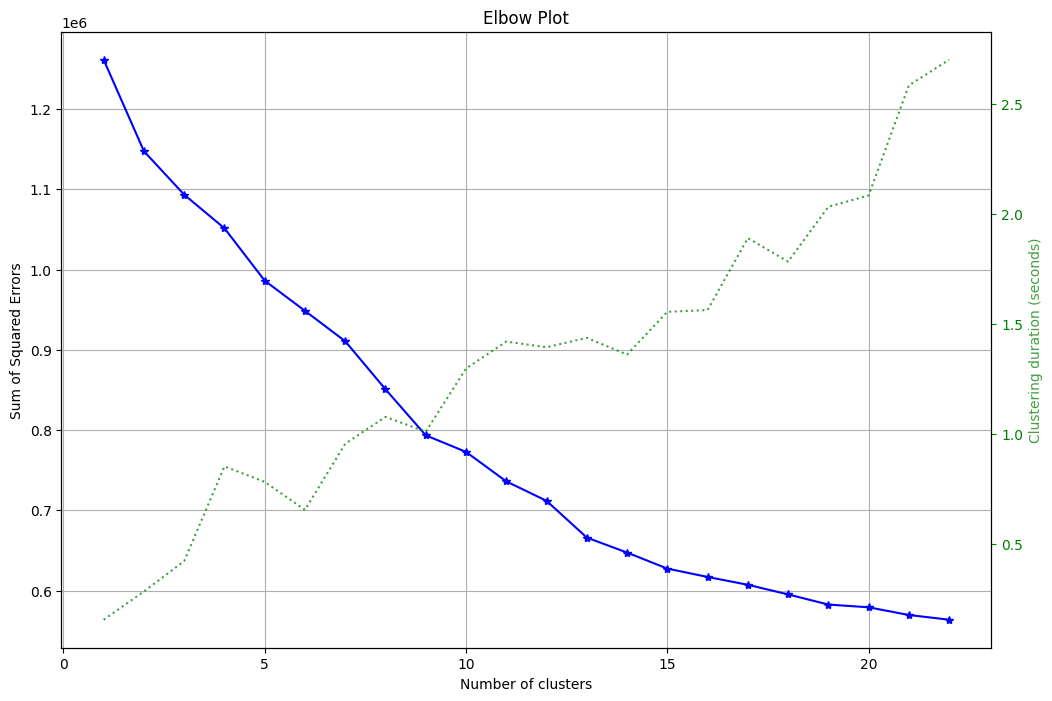

In [168]:
from scikitplot.metrics import plot_roc_curve

model = KMeans()

plot_elbow_curve(model, X_HeartDisease, cluster_ranges=range(1, 23), figsize=(12, 8));

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


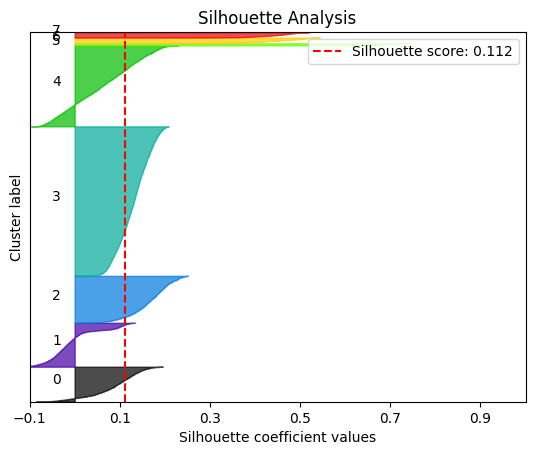

In [186]:
model = KMeans(8, random_state=1)
model.fit(X_HeartDisease,)

plot_silhouette(X_HeartDisease, model.labels_);

In [187]:
import sklearn.cluster as cluster

K = range(1,23)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X_HeartDisease)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [188]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,1.261458e+06
1,2,1.147423e+06
2,3,1.088629e+06
3,4,1.049070e+06
4,5,9.915849e+05
5,6,9.305220e+05
6,7,9.092135e+05
7,8,8.638082e+05
8,9,7.983770e+05
9,10,7.955175e+05


<Axes: xlabel='Clusters', ylabel='WSS'>

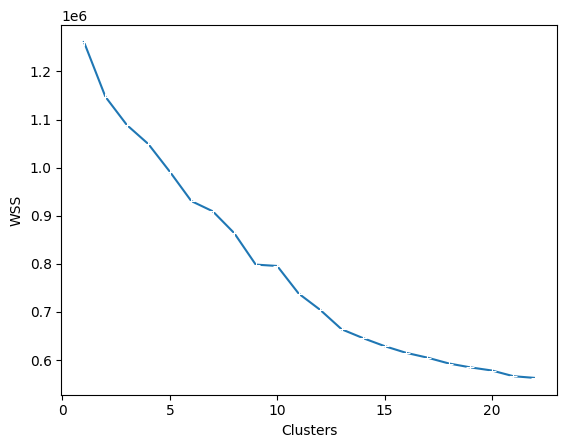

In [189]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 3 Clusters

In [184]:
import sklearn.metrics as metrics

### Apply Silhouette score to find the best k-number
The highest Silhouette score is the best

In [190]:
SK = range(2,23)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X_HeartDisease).labels_
    score = metrics.silhouette_score(X_HeartDisease,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X_HeartDisease,labels,metric="euclidean",sample_size=1000,random_state=200)))

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 2 is 0.1276414145167904


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 3 is 0.13501795739072295


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 4 is 0.13362589135195474


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 5 is 0.10999839866764037


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 6 is 0.13388214283960545


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 7 is 0.0780248474452087


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 8 is 0.12142390301621947


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 9 is 0.09358923899530427


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 10 is 0.09441928116054125


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 11 is 0.11029221303201645


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 12 is 0.11474687226624712


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 13 is 0.11357760007517738


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 14 is 0.10071076736366234


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 15 is 0.11136753467888225


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 16 is 0.10835622159981179


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 17 is 0.10640967078449756


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 18 is 0.10002480228656287


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 19 is 0.08861665721562732


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 20 is 0.10074317341603567


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 21 is 0.09729746778960231


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 22 is 0.09891684199469865


### Result:
the k should be equal to 3 because
the highest Silhouette score for k(clusters) = 3 is 0.13501795739072295

In [191]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.127641
1,3,0.135018
2,4,0.133626
3,5,0.109998
4,6,0.133882
5,7,0.078025
6,8,0.121424
7,9,0.093589
8,10,0.094419
9,11,0.110292


<Axes: xlabel='Clusters', ylabel='Sil Score'>

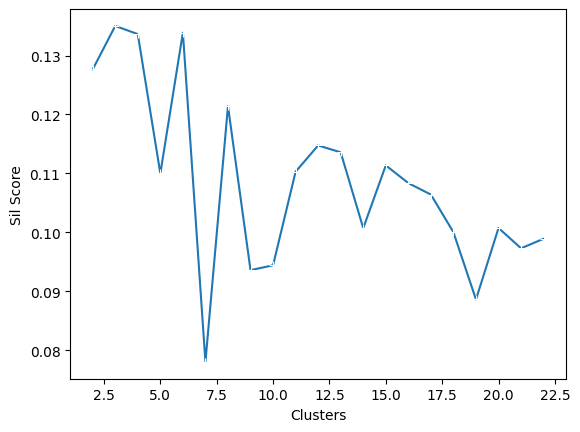

In [192]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

### the K-Means Clustering between Smoking and Sex features

In [213]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=3 ,init="k-means++")
kmeans = kmeans.fit(X_HeartDisease[['Smoking','Sex']])

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [214]:
X_HeartDisease['Clusters'] = kmeans.labels_

In [215]:
kmeans.labels_

array([0, 1, 2, ..., 1, 2, 2])

<Axes: xlabel='Sex', ylabel='Smoking'>

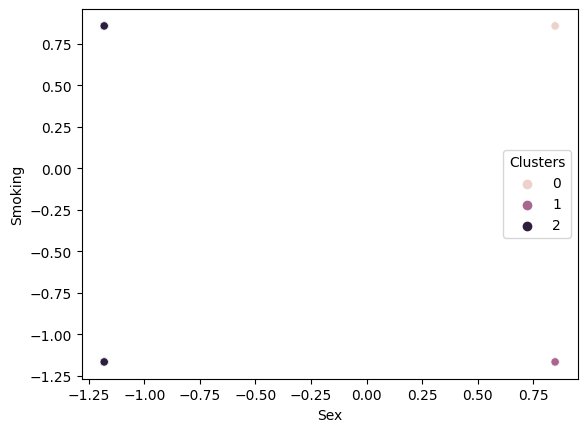

In [216]:
sns.scatterplot(x="Sex", y="Smoking",hue = 'Clusters',  data=X_HeartDisease)

### the K-Means Clustering between Diabetic_Yes and Race_White features

In [200]:
scaler = StandardScaler()
X_HeartDisease = pd.DataFrame(scaler.fit_transform(df_train_HeartDisease),columns = df_train_HeartDisease.columns)

In [201]:
X_HeartDisease

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,...,Nw_SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),predicted_proba,HeartDisease
0,0.857114,-0.165139,-0.398374,-0.746100,0.847486,0.772512,-0.202165,2.304016,-0.336713,-0.446803,...,-0.594030,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
1,-1.166706,-0.165139,-0.398374,-0.746100,0.847486,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,-0.594030,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
2,-1.166706,-0.165139,-0.398374,-0.746100,-1.179960,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,-0.213122,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
3,-1.166706,-0.165139,-0.398374,-0.746100,-1.179960,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,-0.594030,-0.120502,-0.076246,-0.161729,-2.117558,-0.124866,-0.678770,-0.028973,-4.012609,0.0
4,-1.166706,-0.165139,-0.398374,-0.746100,0.847486,0.772512,-0.202165,-0.434025,-0.336713,-0.446803,...,-0.213122,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,-4.012609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54841,-1.166706,-0.165139,-0.398374,1.340302,-1.179960,-1.294479,0.720600,-0.434025,-0.336713,-0.446803,...,1.420923,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,0.613723,0.0
54842,0.857114,-0.165139,-0.398374,-0.746100,-1.179960,0.772512,0.720600,-0.434025,-0.336713,-0.446803,...,-0.561809,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,0.613723,0.0
54843,-1.166706,-0.165139,-0.398374,1.340302,0.847486,0.772512,-1.124930,-0.434025,-0.336713,-0.446803,...,0.287014,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,-0.678770,-0.028973,0.613723,0.0
54844,0.857114,-0.165139,-0.398374,1.340302,-1.179960,-1.294479,1.643364,-0.434025,-0.336713,-0.446803,...,-0.366159,-0.120502,-0.076246,-0.161729,0.472242,-0.124866,1.473252,-0.028973,0.613723,0.0


C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

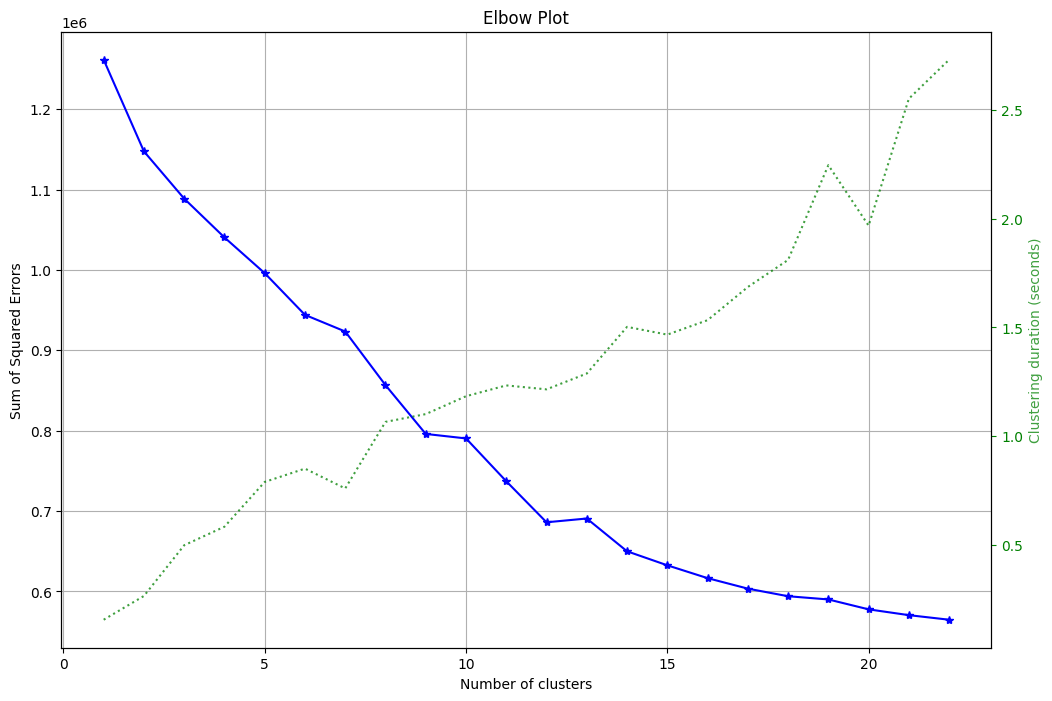

In [203]:
model = KMeans()

plot_elbow_curve(model, X_HeartDisease, cluster_ranges=range(1, 23), figsize=(12, 8));

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


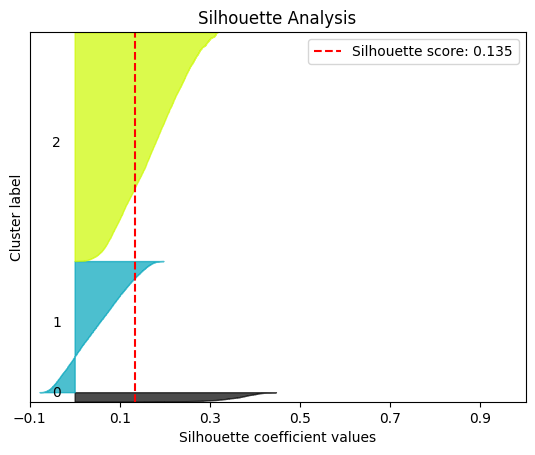

In [204]:
model = KMeans(3, random_state=1)
model.fit(X_left)

plot_silhouette(X_HeartDisease, model.labels_);

In [205]:
import sklearn.cluster as cluster

K = range(1,4)
wss1 = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X_HeartDisease)
    wss_iter = kmeans.inertia_
    wss1.append(wss_iter)

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [206]:
mycenters1 = pd.DataFrame({'Clusters' : K, 'WSS' : wss1})
mycenters1

,Clusters,WSS
0,1,1.261458e+06
1,2,1.147423e+06
2,3,1.090503e+06


<Axes: xlabel='Clusters', ylabel='WSS'>

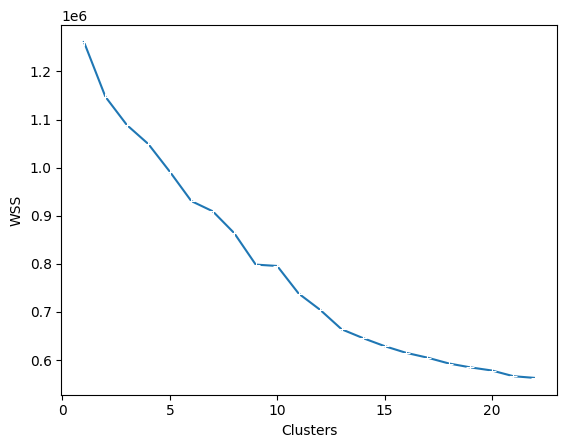

In [207]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 3 Clusters

In [217]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=3 ,init="k-means++")
kmeans = kmeans.fit(X_left[['Race_White','Diabetic_Yes']])

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [218]:
X_left['Clusters'] = kmeans.labels_

In [220]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

<Axes: xlabel='Race_White', ylabel='Diabetic_Yes'>

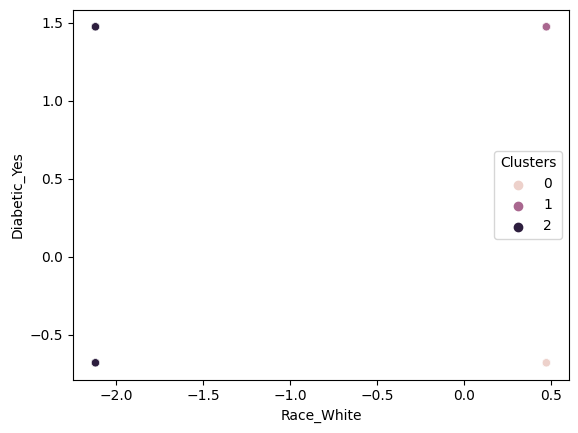

In [221]:
sns.scatterplot(x="Race_White", y="Diabetic_Yes",hue = 'Clusters',  data=X_left)

### Result
It is Clasification project.

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 20. Conclusion<a class="anchor" id="20_Conclusion"></a></div>

Finally, after experimenting with different models I concluded that RandomForestClassifier with SMOTE resampling yield the best recall and precsion for the heart diseas class (91%), and XGBClassifier (SMOTE)) yields the best recall for the no heart disease class (96%). An application of our model is to be used by medical experts in selecting the patients suspected of heart disease in order to conduct further testing on them.